![](Images/shutterstock_1318372334.jpeg)

# Bitcoin and Ethereum Price Forecasting
Authors: Volha Puzikava
***

## Disclaimer
The  described analyses fulfill educational purposes only. The hypothetical business case and the results of forecasting should not be considered as financial advise, and have not been approved by any professional or financial organization.
***

## Overview
Over the last decade, cryptocurrency has gone from overlooked asset to a wildly popular investment. Cryptocurrencies are a form of digital currency secured through cryptography and computer networks. Cryptocurrencies let us buy goods and services, use apps and games or trade them for profit. About 59.1 million Americans owned some form of cryptocurrency in 2021.

Of the more than 1,600 available cryptocurrencies on the market, both Bitcoin and Ethereum are in the top three. They usually move in tandem and are very similar to one another (not suprisingly, since the creator of ethereum learned from Bitcoin and produced more functionalities based on the concepts of Bitcoin). Bitcoin has the highest market cap among all the cryptocurrencies available right now. In a way, it’s the current world champion when it comes to cryptocurrencies. However, according to [Yahoo Finance](https://ca.finance.yahoo.com/news/why-ethereum-could-eventually-pass-200000116.html) Ethereum may overtake Bitcoin.

This project tends to forecast the price for both Bitcoin and Ethereum for the following 12 months in order to find out which of the two is worth investing into. 
***

## Business Problem
The Wall Street Company asked to analyze the prices of the top two cryptocurriences and predict their behaviour for the following 12 months in order to invest in the most promising one and loose as less money as possible. The main purpose of the analysis was to generate different time series models and reveal the most accurate forecast.
***

## Data Understanding
The data for the analysis was taken from [investing.com](https://www.investing.com/crypto/currencies) website. The dataframes contained Bitcoin and Ethereum daily historical data starting January 1, 2017. The information in the datasets included dates, high and low cryptocurrencies prices, the prices at which cryptocurrencies opened at those dates, volatility and the price percent change for those dates. The prices were analyzed up to August 31, 2022 and constituted 2,070 days of data.
***

## Data Preparation and Exploration
The data was uploaded and analyzed. It was found out that the dataframes were in reverse order (from August 31, 2022 to January 1, 2017). The format of the date columns were transformed, sorted in an ascending order and the date was  set as index. The type of the "Price" columns was changed from object to float. The dataframes were joined together for further analysis.

In [1]:
# Import pandas
import pandas as pd

# Load bitcoin dataset
bitcoin_df = pd.read_csv('Bitcoin Historical Data - Investing.com.csv')
bitcoin_df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2065,"Jan 05, 2017",989.3,"1,135.4","1,150.6",874.5,240.01K,-12.86%
2066,"Jan 04, 2017","1,135.4","1,033.3","1,148.5","1,022.3",156.27K,9.88%
2067,"Jan 03, 2017","1,033.3","1,017.0","1,035.5","1,006.5",54.79K,1.60%
2068,"Jan 02, 2017","1,017.0",995.4,"1,031.7",990.2,64.95K,2.17%
2069,"Jan 01, 2017",995.4,963.4,"1,001.6",956.1,41.15K,3.33%


In [2]:
# Check the data type of each column
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2070 non-null   object
 1   Price     2070 non-null   object
 2   Open      2070 non-null   object
 3   High      2070 non-null   object
 4   Low       2070 non-null   object
 5   Vol.      2070 non-null   object
 6   Change %  2070 non-null   object
dtypes: object(7)
memory usage: 113.3+ KB


In [3]:
# Convert the date format and sort the dates in the ascending order
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'], infer_datetime_format=True)
bitcoin = bitcoin_df.sort_values(by='Date')
bitcoin

,Date,Price,Open,High,Low,Vol.,Change %
2069,2017-01-01,995.4,963.4,"1,001.6",956.1,41.15K,3.33%
2068,2017-01-02,"1,017.0",995.4,"1,031.7",990.2,64.95K,2.17%
2067,2017-01-03,"1,033.3","1,017.0","1,035.5","1,006.5",54.79K,1.60%
2066,2017-01-04,"1,135.4","1,033.3","1,148.5","1,022.3",156.27K,9.88%
2065,2017-01-05,989.3,"1,135.4","1,150.6",874.5,240.01K,-12.86%
...,...,...,...,...,...,...,...
4,2022-08-28,"19,550.2","20,034.2","20,150.8","19,542.9",159.60K,-2.41%
3,2022-08-29,"20,295.8","19,551.3","20,394.5","19,551.2",248.04K,3.81%
2,2022-08-30,"19,792.6","20,295.6","20,558.2","19,559.7",308.41K,-2.48%
1,2022-08-31,"20,043.9","19,793.4","20,469.1","19,793.4",318.17K,1.27%


In [4]:
# Set date as index
bitcoin.set_index('Date', inplace=True)
bitcoin.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-01-01,995.4,963.4,"1,001.6",956.1,41.15K,3.33%
2017-01-02,"1,017.0",995.4,"1,031.7",990.2,64.95K,2.17%
2017-01-03,"1,033.3","1,017.0","1,035.5","1,006.5",54.79K,1.60%
2017-01-04,"1,135.4","1,033.3","1,148.5","1,022.3",156.27K,9.88%
2017-01-05,989.3,"1,135.4","1,150.6",874.5,240.01K,-12.86%


In [5]:
# Detect the missing values
bitcoin.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [6]:
# Select the column for further analysis
bitcoin = bitcoin.loc[:, ['Price']]
bitcoin.head()

,Price
Date,
2017-01-01,995.4
2017-01-02,"1,017.0"
2017-01-03,"1,033.3"
2017-01-04,"1,135.4"
2017-01-05,989.3


In [7]:
# Change "Price" column type to float 
bitcoin["Price"] = bitcoin["Price"].replace("[$,]", "", regex=True).astype(float)
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2017-01-01 to 2022-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


In [8]:
# Load ethereum dataset
ethereum_df = pd.read_csv('Ethereum Historical Data - Investing.com (1).csv')
ethereum_df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2065,"Jan 05, 2017",10.15,11.16,11.70,9.20,490.64K,-7.73%
2066,"Jan 04, 2017",11.00,9.57,11.10,9.44,556.25K,12.94%
2067,"Jan 03, 2017",9.74,8.43,9.90,8.30,603.42K,16.37%
2068,"Jan 02, 2017",8.37,8.19,8.50,8.11,101.27K,2.07%
2069,"Jan 01, 2017",8.20,8.17,8.59,8.03,144.92K,2.50%


In [9]:
# Check the data type of each column
ethereum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2070 non-null   object
 1   Price     2070 non-null   object
 2   Open      2070 non-null   object
 3   High      2070 non-null   object
 4   Low       2070 non-null   object
 5   Vol.      2070 non-null   object
 6   Change %  2070 non-null   object
dtypes: object(7)
memory usage: 113.3+ KB


In [10]:
# Convert the date format and sort the dates in the ascending order
ethereum_df['Date'] = pd.to_datetime(ethereum_df['Date'], infer_datetime_format=True)
ethereum = ethereum_df.sort_values(by='Date')
ethereum

,Date,Price,Open,High,Low,Vol.,Change %
2069,2017-01-01,8.20,8.17,8.59,8.03,144.92K,2.50%
2068,2017-01-02,8.37,8.19,8.50,8.11,101.27K,2.07%
2067,2017-01-03,9.74,8.43,9.90,8.30,603.42K,16.37%
2066,2017-01-04,11.00,9.57,11.10,9.44,556.25K,12.94%
2065,2017-01-05,10.15,11.16,11.70,9.20,490.64K,-7.73%
...,...,...,...,...,...,...,...
4,2022-08-28,"1,426.25","1,490.88","1,507.92","1,424.69",633.35K,-4.33%
3,2022-08-29,"1,552.60","1,426.25","1,559.46","1,424.33",931.76K,8.86%
2,2022-08-30,"1,523.34","1,552.56","1,605.30","1,475.68",1.14M,-1.88%
1,2022-08-31,"1,555.12","1,523.39","1,617.09","1,523.39",1.07M,2.09%


In [11]:
# Set date as index
ethereum.set_index('Date', inplace=True)
ethereum.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-01-01,8.20,8.17,8.59,8.03,144.92K,2.50%
2017-01-02,8.37,8.19,8.50,8.11,101.27K,2.07%
2017-01-03,9.74,8.43,9.90,8.30,603.42K,16.37%
2017-01-04,11.00,9.57,11.10,9.44,556.25K,12.94%
2017-01-05,10.15,11.16,11.70,9.20,490.64K,-7.73%


In [12]:
# Detect missing values
ethereum.isna().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [13]:
# Choose the necessary column from the dataset
ethereum = ethereum.loc[:, ['Price']]
ethereum.head()

,Price
Date,
2017-01-01,8.20
2017-01-02,8.37
2017-01-03,9.74
2017-01-04,11.00
2017-01-05,10.15


In [14]:
# Change "Price" column type to float 
ethereum["Price"] = ethereum["Price"].replace("[$,]", "", regex=True).astype(float)
ethereum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2017-01-01 to 2022-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


In [15]:
# Join the datasets using the outer join
joined_df = bitcoin.join(ethereum, how='outer', rsuffix=' Ethereum')
joined_df.dropna(inplace=True)
joined_df

,Price,Price Ethereum
Date,,
2017-01-01,995.4,8.20
2017-01-02,1017.0,8.37
2017-01-03,1033.3,9.74
2017-01-04,1135.4,11.00
2017-01-05,989.3,10.15
...,...,...
2022-08-28,19550.2,1426.25
2022-08-29,20295.8,1552.60
2022-08-30,19792.6,1523.34


In [16]:
# Rename the column
df = joined_df.rename(columns={"Price" : "Price Bitcoin"})
df

,Price Bitcoin,Price Ethereum
Date,,
2017-01-01,995.4,8.20
2017-01-02,1017.0,8.37
2017-01-03,1033.3,9.74
2017-01-04,1135.4,11.00
2017-01-05,989.3,10.15
...,...,...
2022-08-28,19550.2,1426.25
2022-08-29,20295.8,1552.60
2022-08-30,19792.6,1523.34


The resulted dataset was downsampled to monthly mean. As a result, the data with 69 rows was formed and used for further analysis. The data was visualized. The histograms and kde plots were created to check how the data was distributed.

In [17]:
# Change the frequency to monthly and calculate the monthly mean
df_monthly = df.resample('MS').mean()
df_monthly

,Price Bitcoin,Price Ethereum
Date,,
2017-01-01,909.674194,10.158065
2017-02-01,1061.328571,12.359643
2017-03-01,1129.267742,34.410000
2017-04-01,1215.236667,52.231000
2017-05-01,1877.570968,122.247742
...,...,...
2022-05-01,31695.303226,2187.182581
2022-06-01,24378.823333,1382.460667
2022-07-01,21532.929032,1359.150968


In [18]:
# Check the type of each column
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 2017-01-01 to 2022-09-01
Freq: MS
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price Bitcoin   69 non-null     float64
 1   Price Ethereum  69 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [19]:
# Check for missing values
df_monthly.isnull().sum()

Price Bitcoin     0
Price Ethereum    0
dtype: int64

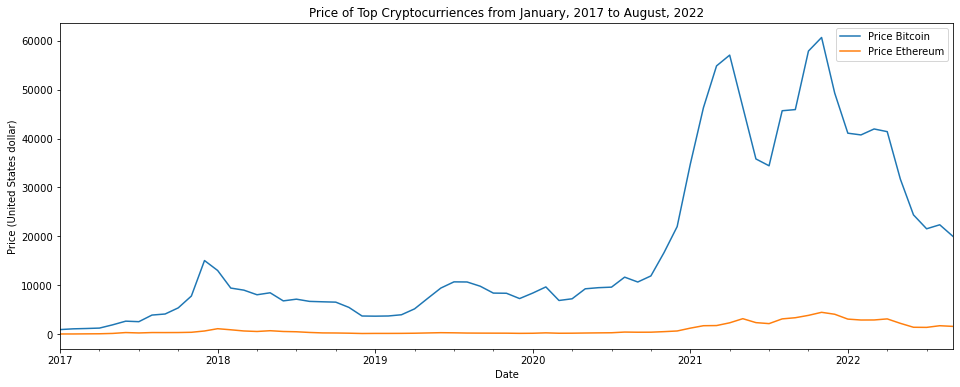

In [20]:
# Import necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the data
ax = df_monthly.plot(figsize=(16,6))
ax.set_ylabel('Price (United States dollar)')
ax.set_xlabel('Date')
ax.set_title('Price of Top Cryptocurriences from January, 2017 to August, 2022')
plt.show;

In [21]:
# Describe the dataset using 5-point statistics
df_monthly.describe()

,Price Bitcoin,Price Ethereum
count,69.000000,69.000000
mean,17592.943648,980.091077
std,17086.004397,1171.304176
min,909.674194,10.158065
25%,6594.463333,185.316000
50%,9404.706667,354.848667
75%,24378.823333,1563.740000
max,60679.753333,4441.232333


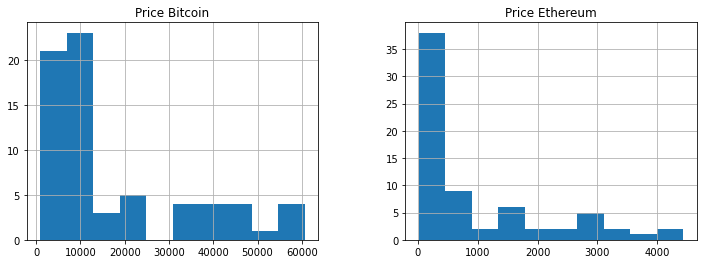

In [22]:
# Plot histograms to check for data distribution
df_monthly.hist(figsize=(12,4));

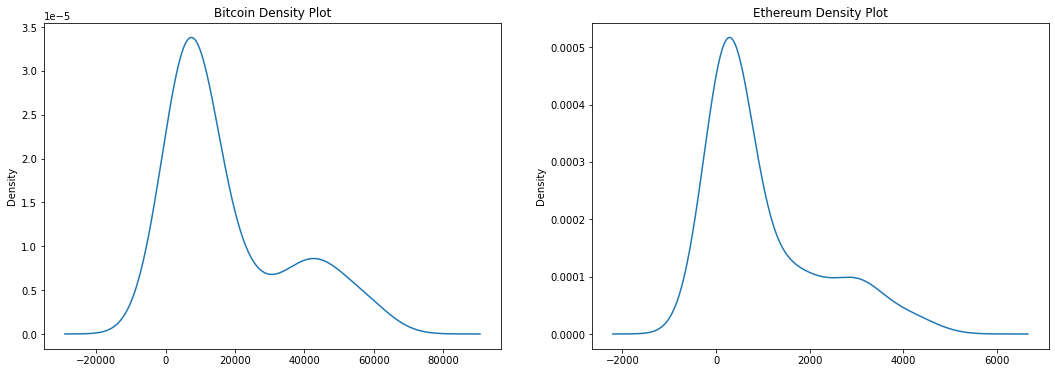

In [23]:
# Visualize density plots
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18,6))
df_monthly['Price Bitcoin'].plot(kind='kde', ax=axes[0])
axes[0].set_title('Bitcoin Density Plot')
df_monthly['Price Ethereum'].plot(kind='kde', ax=axes[1])
axes[1].set_title('Ethereum Density Plot');

From the performed visualizations, it was seen that the data was not normally distributed, but rather skewed. Also, Bitcoin and Ethereum prices belonged to different price ranges and didn't present an opportunity to analyze them one in term of the other.
***

## Data Modeling
Before building any time series models, the data of two cryptocurrencies had to be normalized to one scale. The goal was achieved by applying division and multiplication functions to the data.

In [24]:
# Normalize the data
final_value_bitcoin = df_monthly['Price Bitcoin'].iloc[-1]
final_value_ethereum = df_monthly['Price Ethereum'].iloc[-1]
bitcoin_normalized = df_monthly['Price Bitcoin'].div(final_value_bitcoin).mul(100)
ethereum_normalized = df_monthly['Price Ethereum'].div(final_value_ethereum).mul(100)

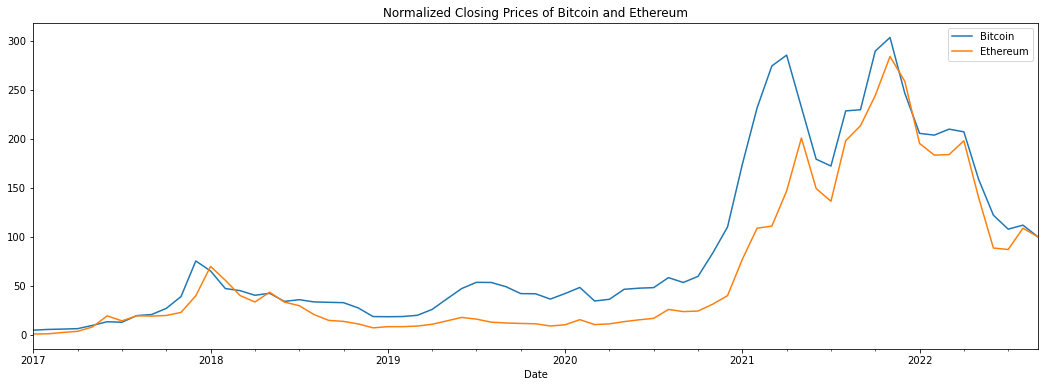

In [25]:
# Visualize the data
fig, ax = plt.subplots(figsize=(18,6))
bitcoin_normalized.plot()
ethereum_normalized.plot()
plt.legend(['Bitcoin','Ethereum'])
plt.title('Normalized Closing Prices of Bitcoin and Ethereum')
plt.show();

### Bitcoin

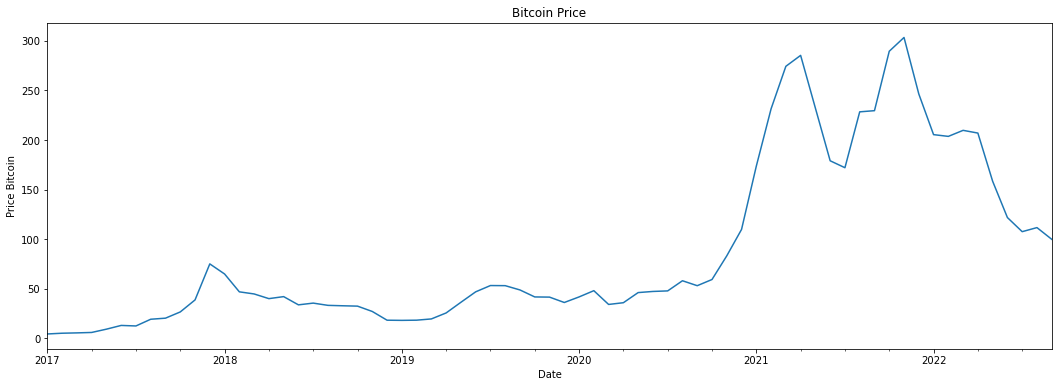

In [26]:
# Plot the normalized bitcoin data
bitcoin_normalized.plot(figsize=(18,6))
plt.xlabel('Date')
plt.ylabel('Price Bitcoin')
plt.title('Bitcoin Price');

The time series was regrouped for yearly average values and compared to see if any changes took place over time. From the below plots, it was seen that Bitcoin usually was at its peak once a year, however, in 2021 it reached its highest value twice.

Also, the boxplot showed that Bitcoin had some extreme values in 2017, 2018 and 2020. The other years could be considered smooth as no outliers were present.

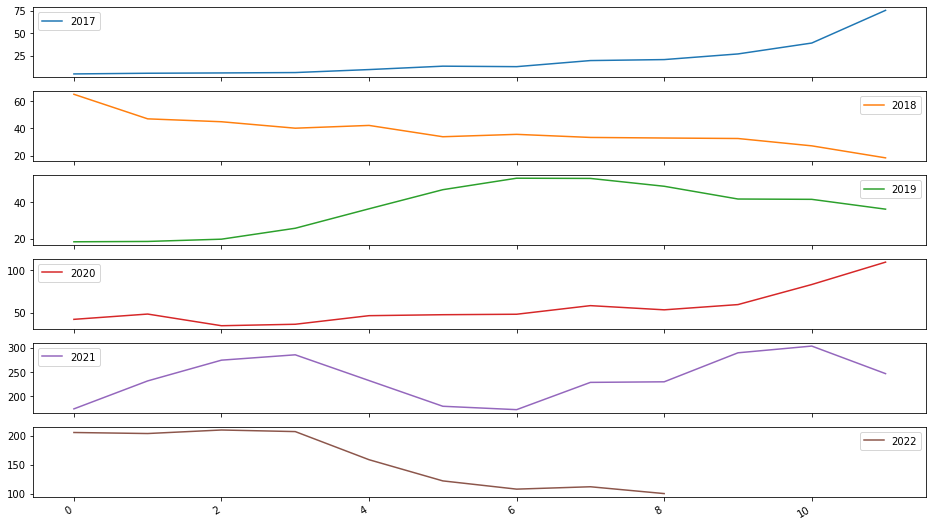

In [27]:
# Use pandas grouper to group values using annual frequency
groups_yearly = bitcoin_normalized.groupby(pd.Grouper(freq='A'))

# Create a new DataFrame and store yearly values in columns 
year_bitcoin = pd.concat([pd.DataFrame(x[1].values) for x in groups_yearly], axis=1)
year_df_bitcoin = pd.DataFrame(year_bitcoin)
year_df_bitcoin.columns = ['2017', '2018', '2019', '2020', '2021', '2022']

# Plot the yearly groups as subplots
year_df_bitcoin.plot(figsize=(16,10), subplots=True, legend=True);

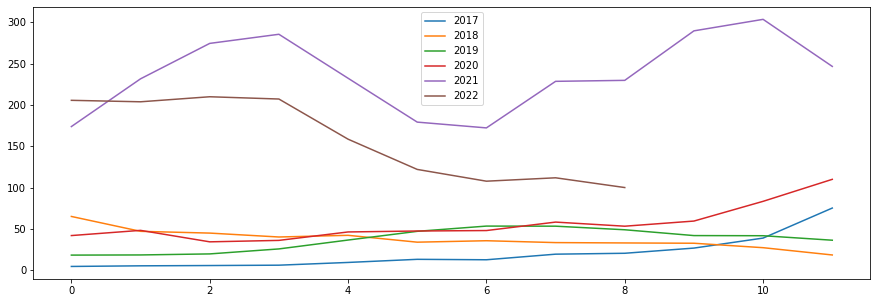

In [28]:
# Plot overlapping yearly groups 
year_df_bitcoin.plot(figsize = (15,5), subplots=False, legend=True);

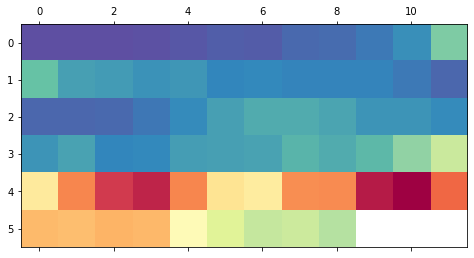

In [29]:
# Create a heatmap
year_matrix = year_df_bitcoin.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

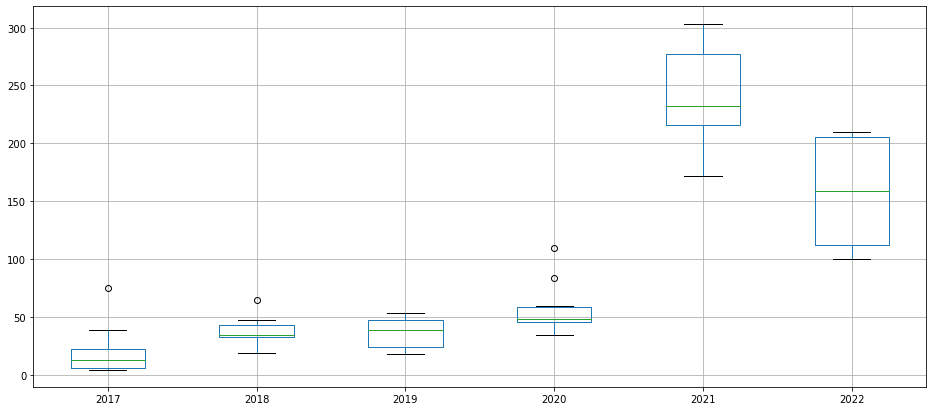

In [30]:
# Generate a box and whiskers plot
year_df_bitcoin.boxplot(figsize=(16,7));

Because chronological order matters in time series, the train-test split was performed by cutting off a portion of data at the end and reserving it as a test set. As a result, 80% of the data or 55 first rows were considered as a train set.

In [31]:
# Find the index which allows to split off 20% of the data
cutoff_bitcoin = round(bitcoin_normalized.shape[0]*0.8)
cutoff_bitcoin

55

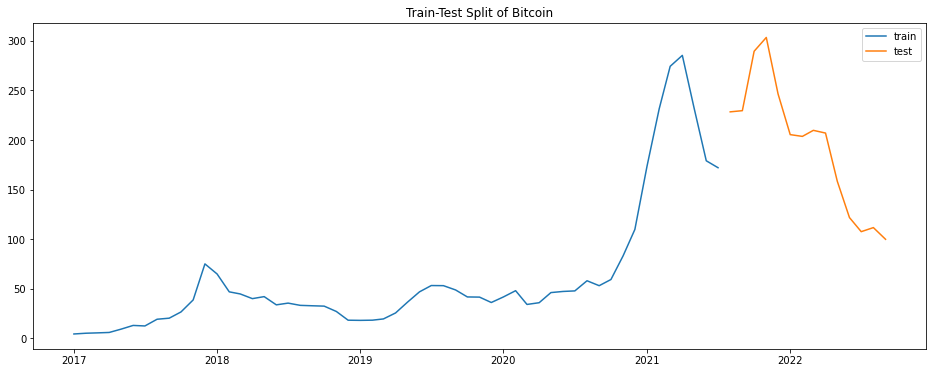

In [32]:
# Define train and test sets acccording to the index found
train_bitcoin = bitcoin_normalized[:cutoff_bitcoin]
test_bitcoin = bitcoin_normalized[cutoff_bitcoin:]

# Plot train and test sets
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(train_bitcoin, label='train')
ax.plot(test_bitcoin, label='test')
ax.set_title('Train-Test Split of Bitcoin')
plt.legend();

In [33]:
# Import necessary library
from sklearn.model_selection import TimeSeriesSplit

# Prepare the model for cross-validation
split = TimeSeriesSplit()
for train_ind, val_ind in split.split(train_bitcoin):
    print(train_ind, val_ind)

[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14 15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19 20 21 22 23 24 25 26 27]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27] [28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36] [37 38 39 40 41 42 43 44 45]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] [46 47 48 49 50 51 52 53 54]


The data was ready for modelling. Different models were built and compared based on the root mean square error (RMSE) and Akaike's Information Criteria (AIC). Better models had lower RMSE and AIC.

#### Baseline Model

Baseline model was built with the help of shift operator. The prediction for the next day was the original series shifted to the future.

In [34]:
# Check the train set
train_bitcoin

Date
2017-01-01      4.549349
2017-02-01      5.307784
2017-03-01      5.647553
2017-04-01      6.077490
2017-05-01      9.389874
2017-06-01     13.164297
2017-07-01     12.631425
2017-08-01     19.398703
2017-09-01     20.482787
2017-10-01     26.762738
2017-11-01     38.868057
2017-12-01     75.188827
2018-01-01     65.031659
2018-02-01     47.024557
2018-03-01     44.900121
2018-04-01     40.176355
2018-05-01     42.204009
2018-06-01     33.911741
2018-07-01     35.662877
2018-08-01     33.399019
2018-09-01     32.979407
2018-10-01     32.617642
2018-11-01     27.240390
2018-12-01     18.433979
2019-01-01     18.270606
2019-02-01     18.459987
2019-03-01     19.711544
2019-04-01     25.746619
2019-05-01     36.486861
2019-06-01     47.033646
2019-07-01     53.374024
2019-08-01     53.254030
2019-09-01     48.924585
2019-10-01     41.884070
2019-11-01     41.709451
2019-12-01     36.282075
2020-01-01     41.903009
2020-02-01     48.193172
2020-03-01     34.322912
2020-04-01     36.06

In [35]:
# Check for the missing values
train_bitcoin.isna().sum()

0

In [36]:
# Build a baseline model
naive = train_bitcoin.shift(1)
naive = naive.dropna()
naive

Date
2017-02-01      4.549349
2017-03-01      5.307784
2017-04-01      5.647553
2017-05-01      6.077490
2017-06-01      9.389874
2017-07-01     13.164297
2017-08-01     12.631425
2017-09-01     19.398703
2017-10-01     20.482787
2017-11-01     26.762738
2017-12-01     38.868057
2018-01-01     75.188827
2018-02-01     65.031659
2018-03-01     47.024557
2018-04-01     44.900121
2018-05-01     40.176355
2018-06-01     42.204009
2018-07-01     33.911741
2018-08-01     35.662877
2018-09-01     33.399019
2018-10-01     32.979407
2018-11-01     32.617642
2018-12-01     27.240390
2019-01-01     18.433979
2019-02-01     18.270606
2019-03-01     18.459987
2019-04-01     19.711544
2019-05-01     25.746619
2019-06-01     36.486861
2019-07-01     47.033646
2019-08-01     53.374024
2019-09-01     53.254030
2019-10-01     48.924585
2019-11-01     41.884070
2019-12-01     41.709451
2020-01-01     36.282075
2020-02-01     41.903009
2020-03-01     48.193172
2020-04-01     34.322912
2020-05-01     36.06

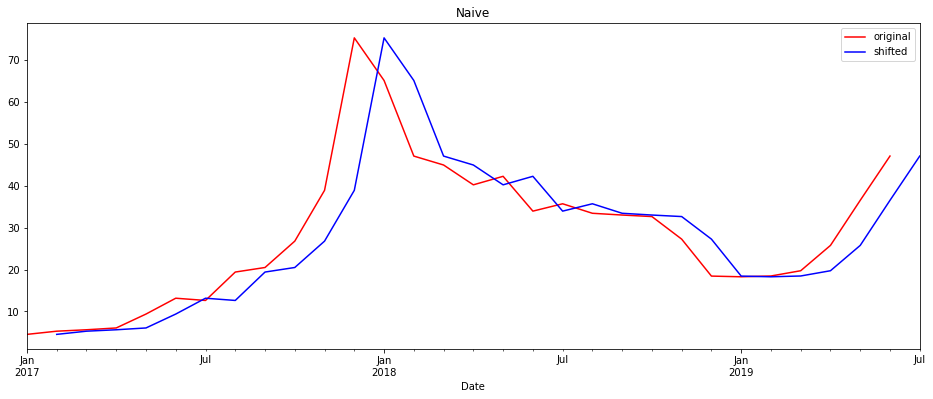

In [37]:
# Plot the original and predicted data
fig, ax = plt.subplots(figsize=(16,6))
train_bitcoin[0:30].plot(ax=ax, c='r', label='original')
naive[0:30].plot(ax=ax, c='b', label='shifted')
ax.set_title('Naive')
ax.legend();

In [38]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate RMSE
np.sqrt(mean_squared_error(train_bitcoin[1:], naive.dropna()))

19.005466687771364

The rolling standard deviation of the residuals as well as the residual variance were plotted. The graphs showed that the performance of the model varied at different points in time. It was due to the trends in the data. The series were made stationary by differencing the data. The stationarity of the data was then checked by the function that used rolling statistics and the Dickey-Fuller test.

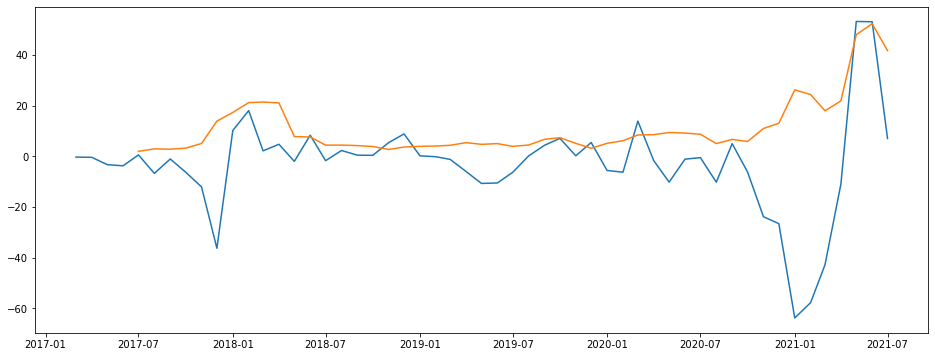

In [39]:
# Plot the rolling standard deviation of the residuals
fig, ax = plt.subplots(figsize=(16,6))
residuals = naive[1:] - train_bitcoin[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(5).std());

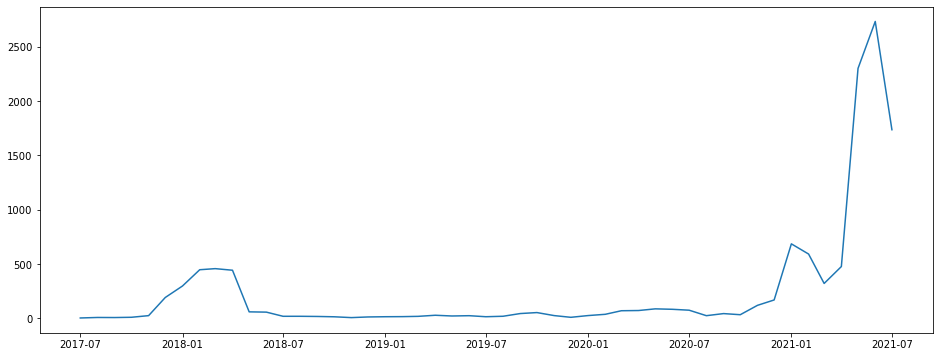

In [40]:
# Plot the residual variance
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(residuals.index, residuals.rolling(5).var());

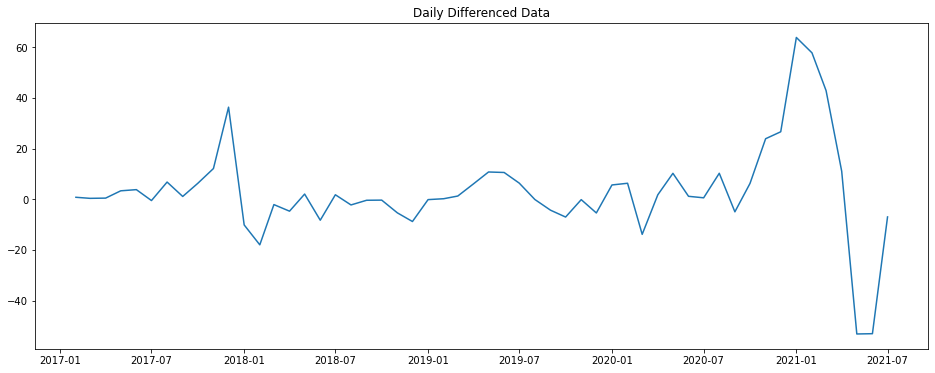

In [41]:
# Check how differenced data looks
fig, ax = plt.subplots(figsize=(16,6))
train_bitcoin_diff = train_bitcoin.diff()
ax.plot(train_bitcoin_diff)
ax.set_title('Daily Differenced Data');

In [42]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test
def stationarity_check(DF):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = DF.rolling(window=8, center=False).mean()
    roll_std = DF.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(DF) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(16,6))
    orig = plt.plot(DF, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

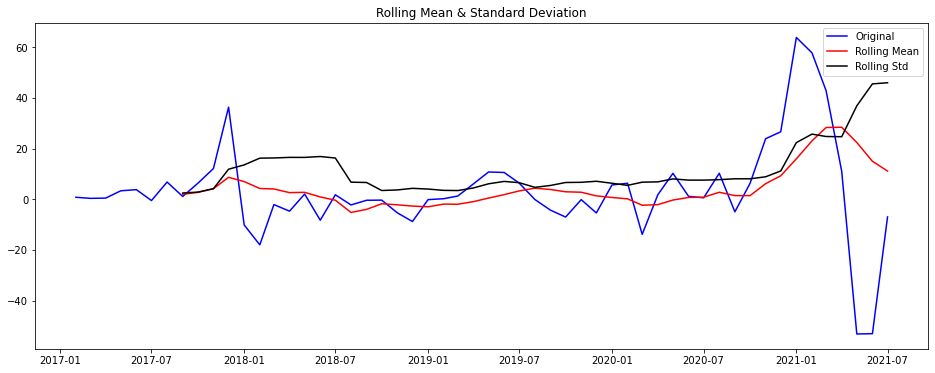

Results of Dickey-Fuller Test: 

Test Statistic                 -2.960617
p-value                         0.038740
#Lags Used                      4.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [43]:
# Check the stationarity of the differenced data
stationarity_check(train_bitcoin_diff.dropna())

The p-value associated with the Dickey-Fuller statistical test was equal to 0.039, which was less than 0.05, so we safely assumed that the differenced data was stationary.

#### Random Walk Model

In [44]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

# Build random walk model
random_walk_bitcoin = ARIMA(train_bitcoin, order=(0,1,0)).fit()
y_hat_rw = random_walk_bitcoin.predict(typ='levels')
y_hat_rw

Date
2017-01-01      0.000000
2017-02-01      4.549349
2017-03-01      5.307784
2017-04-01      5.647553
2017-05-01      6.077490
2017-06-01      9.389874
2017-07-01     13.164297
2017-08-01     12.631425
2017-09-01     19.398703
2017-10-01     20.482787
2017-11-01     26.762738
2017-12-01     38.868057
2018-01-01     75.188827
2018-02-01     65.031659
2018-03-01     47.024557
2018-04-01     44.900121
2018-05-01     40.176355
2018-06-01     42.204009
2018-07-01     33.911741
2018-08-01     35.662877
2018-09-01     33.399019
2018-10-01     32.979407
2018-11-01     32.617642
2018-12-01     27.240390
2019-01-01     18.433979
2019-02-01     18.270606
2019-03-01     18.459987
2019-04-01     19.711544
2019-05-01     25.746619
2019-06-01     36.486861
2019-07-01     47.033646
2019-08-01     53.374024
2019-09-01     53.254030
2019-10-01     48.924585
2019-11-01     41.884070
2019-12-01     41.709451
2020-01-01     36.282075
2020-02-01     41.903009
2020-03-01     48.193172
2020-04-01     34.32

In [45]:
# Check for AIC
random_walk_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Price Bitcoin   No. Observations:                   55
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -235.638
Date:                Mon, 05 Sep 2022   AIC                            473.276
Time:                        07:40:03   BIC                            475.265
Sample:                    01-01-2017   HQIC                           474.043
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       361.2280     39.878      9.058      0.000     283.069     439.387
===================================================================================
Ljung-Box (L1) (Q):                  21.73   Jarque-Bera (JB):                38.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.99   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
# Check the RMSE
np.sqrt(mean_squared_error(train_bitcoin, y_hat_rw))

18.84188556194123

In [47]:
# Cross validate the model
train_bitcoin_with_ind = train_bitcoin.reset_index()
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(0,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

24.13922549816902
12.204646094755823
19.7565565123386
10.10815315979619
149.0419309650143


Before plotting Autoregressive and Moving Average Models, autocorrelation and partial autocorrelation were plotted.

The Autoregressive Model was investigated first with lag length selected from the PACF. The shaded area of the graph represented the confidence interval. The correlation in the shaded area meant there was no statistically significant correlation between lags. From the graph it was clearly seen that within 1 lag the AR was significant. Which meant, we could use AR equal to 1. There was also a statistically significant 2nd term, so adding another AR was another posiibility.

Moving Average Model was predicted by using the ACF. The series showed positive significant correlation at lag 1, which suggested adding MA term equal to 1.

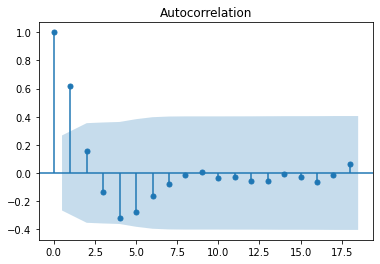

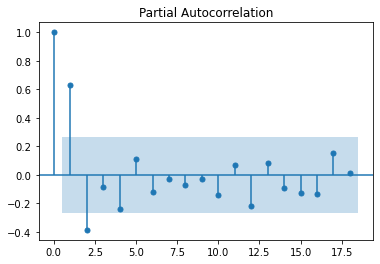

In [48]:
# Import necessary libraries
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation and partial autocorrelation
plot_acf(train_bitcoin_diff.dropna())
plot_pacf(train_bitcoin_diff.dropna());

#### 1st Order Autoregressive Model (AR) 

An autoregressive model is when a value from a time series is regressed on previous values.

In [49]:
# Generate 1st order AR Model
ar_1_bitcoin = ARIMA(train_bitcoin, order=(1,1,0)).fit()
y_hat_ar1 = ar_1_bitcoin.predict(typ='levels')
y_hat_ar1

Date
2017-01-01      0.000000
2017-02-01      4.550345
2017-03-01      5.777369
2017-04-01      5.857921
2017-05-01      6.343685
2017-06-01     11.440734
2017-07-01     15.501229
2017-08-01     12.301498
2017-09-01     23.588659
2017-10-01     21.153997
2017-11-01     30.650965
2017-12-01     46.363057
2018-01-01     97.676810
2018-02-01     58.742855
2018-03-01     35.875470
2018-04-01     43.584778
2018-05-01     37.251637
2018-06-01     43.459431
2018-07-01     28.777588
2018-08-01     36.747092
2018-09-01     31.997353
2018-10-01     32.719605
2018-11-01     32.393655
2018-12-01     23.911068
2019-01-01     12.981496
2019-02-01     18.169453
2019-03-01     18.577242
2019-04-01     20.486446
2019-05-01     29.483231
2019-06-01     43.136675
2019-07-01     53.563681
2019-08-01     57.299665
2019-09-01     53.179736
2019-10-01     46.244012
2019-11-01     37.524939
2019-12-01     41.601336
2020-01-01     32.921718
2020-02-01     45.383207
2020-03-01     52.087722
2020-04-01     25.73

In [50]:
# Check for AIC
ar_1_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Price Bitcoin   No. Observations:                   55
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -222.255
Date:                Mon, 05 Sep 2022   AIC                            448.510
Time:                        07:40:38   BIC                            452.488
Sample:                    01-01-2017   HQIC                           450.044
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6191      0.074      8.410      0.000       0.475       0.763
sigma2       218.0755     22.190      9.828      0.000     174.583     261.568
===================================================================================
Ljung-Box (L1) (Q):                   2.52   Jarque-Bera (JB):                73.61
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               3.62   Skew:                            -0.82
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
# Check the RMSE
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ar1))

14.64543958890845

In [52]:
# Cross validate the model
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(1,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

22.329612675615625
12.494324548233037
18.518963517708197
9.151607904381828
147.90875607209625


#### 2nd Order Autoregressive Model (AR) 

In [53]:
# Generate 2nd order AR Model
ar_2_bitcoin = ARIMA(train_bitcoin, order=(2,1,0)).fit()
y_hat_ar2 = ar_2_bitcoin.predict(typ='levels')
y_hat_ar2

Date
2017-01-01      0.000000
2017-02-01      4.550371
2017-03-01      5.777642
2017-04-01      5.645204
2017-05-01      6.315571
2017-06-01     12.074808
2017-07-01     15.126274
2017-08-01     10.704975
2017-09-01     25.432826
2017-10-01     18.784883
2017-11-01     31.748524
2017-12-01     46.849411
2018-01-01    101.755652
2018-02-01     42.163135
2018-03-01     35.469100
2018-04-01     50.072665
2018-05-01     36.935036
2018-06-01     45.786671
2018-07-01     25.983311
2018-08-01     40.395000
2018-09-01     30.768837
2018-10-01     33.498368
2018-11-01     32.469305
2018-12-01     22.751006
2019-01-01     12.942130
2019-02-01     21.554167
2019-03-01     18.686578
2019-04-01     20.715553
2019-05-01     30.456436
2019-06-01     43.388040
2019-07-01     51.938720
2019-08-01     54.732419
2019-09-01     50.685355
2019-10-01     45.243400
2019-11-01     37.505311
2019-12-01     44.296689
2020-01-01     31.676762
2020-02-01     48.853231
2020-03-01     51.423669
2020-04-01     19.93

In [54]:
# Check for AIC
ar_2_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Price Bitcoin   No. Observations:                   55
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -218.604
Date:                Mon, 05 Sep 2022   AIC                            443.208
Time:                        07:41:53   BIC                            449.175
Sample:                    01-01-2017   HQIC                           445.509
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8610      0.117      7.387      0.000       0.633       1.089
ar.L2         -0.3888      0.108     -3.590      0.000      -0.601      -0.177
sigma2       189.3353     22.022      8.597      0.000     146.172     232.498
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                46.88
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.43   Skew:                            -0.27
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
# Check the RMSE
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ar2))

13.648232106377348

In [56]:
# Cross validate the model
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(2,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

18.90368067952409
13.54466788071547
19.605990573140918
9.16527832983953
148.02747804890663


#### Moving Average Model (MA)

The Moving Average model can be described as the weighted sum of today's and yesterday's noise.

In [57]:
# Generate 1st order MA model
ma_1_bitcoin = ARIMA(train_bitcoin, order=(0,1,1)).fit()
y_hat_ma1 = ma_1_bitcoin.predict(typ='levels')
y_hat_ma1

Date
2017-01-01      0.000000
2017-02-01      4.550043
2017-03-01      5.671635
2017-04-01      5.632525
2017-05-01      6.382532
2017-06-01     11.542327
2017-07-01     14.350833
2017-08-01     11.358894
2017-09-01     25.386884
2017-10-01     16.817255
2017-11-01     34.211038
2017-12-01     42.359602
2018-01-01     99.817399
2018-02-01     38.926211
2018-03-01     53.103267
2018-04-01     38.742067
2018-05-01     41.253133
2018-06-01     42.917896
2018-07-01     27.150079
2018-08-01     42.054206
2018-09-01     26.900746
2018-10-01     37.543254
2018-11-01     28.919494
2018-12-01     25.979718
2019-01-01     12.768633
2019-02-01     22.401493
2019-03-01     15.500699
2019-04-01     22.873053
2019-05-01     27.904096
2019-06-01     42.930813
2019-07-01     50.114058
2019-08-01     55.821611
2019-09-01     51.326287
2019-10-01     47.121384
2019-11-01     37.951886
2019-12-01     44.530636
2020-01-01     30.089043
2020-02-01     50.772952
2020-03-01     46.256269
2020-04-01     25.36

In [58]:
# Check for AIC
ma_1_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Price Bitcoin   No. Observations:                   55
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -220.515
Date:                Mon, 05 Sep 2022   AIC                            445.030
Time:                        07:42:34   BIC                            449.008
Sample:                    01-01-2017   HQIC                           446.565
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7508      0.084      8.913      0.000       0.586       0.916
sigma2       203.1858     26.477      7.674      0.000     151.291     255.081
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):                31.97
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               2.69   Skew:                             0.03
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
# Check the RMSE
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ma1))

14.13855625126194

In [60]:
# Cross validate the model
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(0,1,1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

23.58069773404381
12.936969216445133
18.46433551460482
9.048178454927012
147.46511260417657


Before going forward, the AIC and RMSE values for the resulted models were checked again.

In [62]:
# Print the AIC values for the resulted models
print(random_walk_bitcoin.aic)
print(ar_1_bitcoin.aic)
print(ar_2_bitcoin.aic)
print(ma_1_bitcoin.aic)

473.27584075561543
448.5096286484968
443.20821809413053
445.0303640132841


In [63]:
# Write the function that find the RMSE values for the resulted models
def find_rmse(model, train_data=train_bitcoin):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))

In [64]:
# Print the RMSE values
print(find_rmse(random_walk_bitcoin))
print(find_rmse(ar_1_bitcoin))
print(find_rmse(ar_1_bitcoin))
print(find_rmse(ma_1_bitcoin))

18.84188556194123
14.64543958890845
14.64543958890845
14.13855625126194


Based on the AIC and RMSE values, it was found out that it would be better to generate ARIMA model with the 2nd order for AR and the first order for MA.

#### ARIMA(2, 1, 1) Model

In [65]:
# Generate ARIMA(2, 1, 1) model
arma_model_bitcoin = ARIMA(train_bitcoin, order=(2,1,1)).fit()
y_hat_train = arma_model_bitcoin.predict(typ='levels')
y_hat_train

Date
2017-01-01      0.000000
2017-02-01      4.550386
2017-03-01      5.780435
2017-04-01      5.647363
2017-05-01      6.236918
2017-06-01     11.885528
2017-07-01     15.195724
2017-08-01     10.759035
2017-09-01     24.547333
2017-10-01     19.284122
2017-11-01     30.833347
2017-12-01     46.503918
2018-01-01    100.351031
2018-02-01     44.832125
2018-03-01     31.363362
2018-04-01     48.044926
2018-05-01     38.606506
2018-06-01     45.976418
2018-07-01     27.326593
2018-08-01     39.531910
2018-09-01     31.882835
2018-10-01     33.403698
2018-11-01     32.703804
2018-12-01     23.119480
2019-01-01     12.943897
2019-02-01     21.247686
2019-03-01     19.707514
2019-04-01     21.038205
2019-05-01     30.374835
2019-06-01     43.343089
2019-07-01     51.834522
2019-08-01     54.186254
2019-09-01     49.860994
2019-10-01     44.344638
2019-11-01     37.079307
2019-12-01     43.914026
2020-01-01     32.728387
2020-02-01     48.312879
2020-03-01     52.279422
2020-04-01     20.92

In [66]:
# Check for AIC
arma_model_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Price Bitcoin   No. Observations:                   55
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -218.185
Date:                Mon, 05 Sep 2022   AIC                            444.369
Time:                        07:54:24   BIC                            452.325
Sample:                    01-01-2017   HQIC                           447.437
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1463      0.198      5.777      0.000       0.757       1.535
ar.L2         -0.5630      0.116     -4.870      0.000      -0.790      -0.336
ma.L1         -0.3366      0.262     -1.284      0.199      -0.851       0.177
sigma2       186.1960     23.328      7.982      0.000     140.475     231.917
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                33.59
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.48   Skew:                            -0.06
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
# Check the RMSE
np.sqrt(mean_squared_error(train_bitcoin, y_hat_train))

13.534822798157064

In [68]:
# Cross validate the model
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(2,1,1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

19.29827747243993
13.575934888926758
19.736496880943786
12.493210974377472
147.41967180467023


It was possible to reduce AIC by chance, adding p and q terms based on the ACF and PACF visualizations. However, the first step towards fitting an ARIMA model is to find the values of ARIMA(p,d,q) that produce the lowest AIC value. Selection of these parameters requires domain expertise and time. The small ranges of these parameters were generated and a "grid search" to iteratively explore different combinations of parameters was used. 

In [69]:
# Import necessary library
import itertools

# Define the p and q parameters 
p = range(0, 11)
q = range(0, 11)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, [1], q))

# Run a grid with pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    try:
        mod = ARIMA(train_bitcoin,
                    order=comb)

        output = mod.fit()
        ans.append([comb, output.aic])
    except:
        continue
            
ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq    (2, 1, 0)
aic      443.208
Name: 22, dtype: object

The output of the code suggested that ARIMA(2, 1, 0) yielded the lowest AIC value of 443.208. Those parameters considered to be optimal option out of all the models that were generated.

#### ARIMA(2, 1, 0) Model

In [70]:
# Generate ARIMA(2, 1, 0)
arma_bitcoin = ARIMA(train_bitcoin, order=(2,1,0)).fit()
yhat_train = arma_bitcoin.predict(typ='levels')
yhat_train

Date
2017-01-01      0.000000
2017-02-01      4.550371
2017-03-01      5.777642
2017-04-01      5.645204
2017-05-01      6.315571
2017-06-01     12.074808
2017-07-01     15.126274
2017-08-01     10.704975
2017-09-01     25.432826
2017-10-01     18.784883
2017-11-01     31.748524
2017-12-01     46.849411
2018-01-01    101.755652
2018-02-01     42.163135
2018-03-01     35.469100
2018-04-01     50.072665
2018-05-01     36.935036
2018-06-01     45.786671
2018-07-01     25.983311
2018-08-01     40.395000
2018-09-01     30.768837
2018-10-01     33.498368
2018-11-01     32.469305
2018-12-01     22.751006
2019-01-01     12.942130
2019-02-01     21.554167
2019-03-01     18.686578
2019-04-01     20.715553
2019-05-01     30.456436
2019-06-01     43.388040
2019-07-01     51.938720
2019-08-01     54.732419
2019-09-01     50.685355
2019-10-01     45.243400
2019-11-01     37.505311
2019-12-01     44.296689
2020-01-01     31.676762
2020-02-01     48.853231
2020-03-01     51.423669
2020-04-01     19.93

In [71]:
# Check for AIC
arma_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Price Bitcoin   No. Observations:                   55
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -218.604
Date:                Mon, 05 Sep 2022   AIC                            443.208
Time:                        08:15:45   BIC                            449.175
Sample:                    01-01-2017   HQIC                           445.509
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8610      0.117      7.387      0.000       0.633       1.089
ar.L2         -0.3888      0.108     -3.590      0.000      -0.601      -0.177
sigma2       189.3353     22.022      8.597      0.000     146.172     232.498
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                46.88
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.43   Skew:                            -0.27
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
# Check for the RMSE
np.sqrt(mean_squared_error(train_bitcoin, yhat_train))

13.648232106377348

In [73]:
# Cross validate the model
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(2,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

18.90368067952409
13.54466788071547
19.605990573140918
9.16527832983953
148.02747804890663


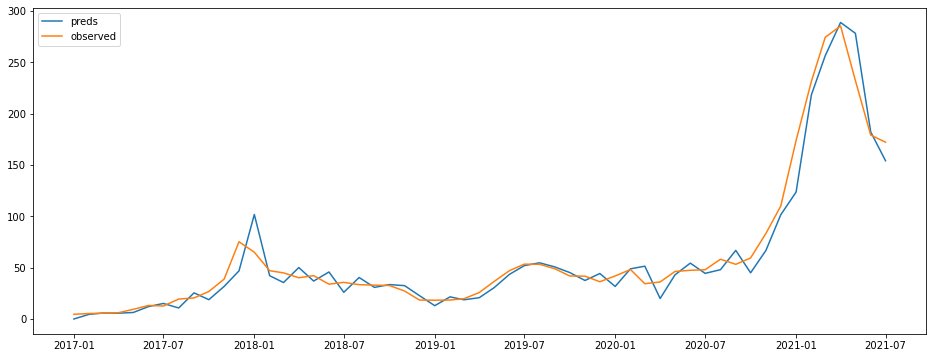

In [74]:
# Plot the observed and predicted values of the train set
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(yhat_train, label='preds')
ax.plot(train_bitcoin, label='observed')
plt.legend()
plt.show();

Once the parameters were chosen, the model was tried on the test set.

In [75]:
# Check the test set
test_bitcoin

Date
2021-08-01    228.480656
2021-09-01    229.663878
2021-10-01    289.550334
2021-11-01    303.464011
2021-12-01    246.536860
2022-01-01    205.512750
2022-02-01    203.741108
2022-03-01    209.830372
2022-04-01    207.086023
2022-05-01    158.510596
2022-06-01    121.920330
2022-07-01    107.687798
2022-08-01    111.789115
2022-09-01    100.000000
Freq: MS, Name: Price Bitcoin, dtype: float64

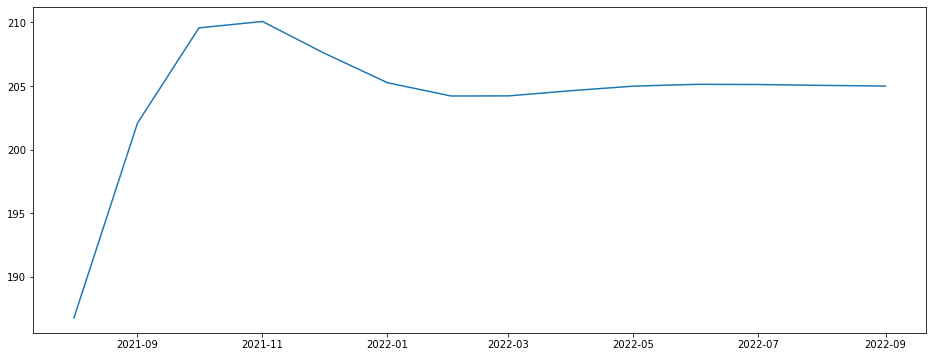

In [76]:
# Evaluate the model's performance and plot the predictions
yhat_test = arma_bitcoin.predict(start=test_bitcoin.index[0], end=test_bitcoin.index[-1], typ='levels')
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(yhat_test);

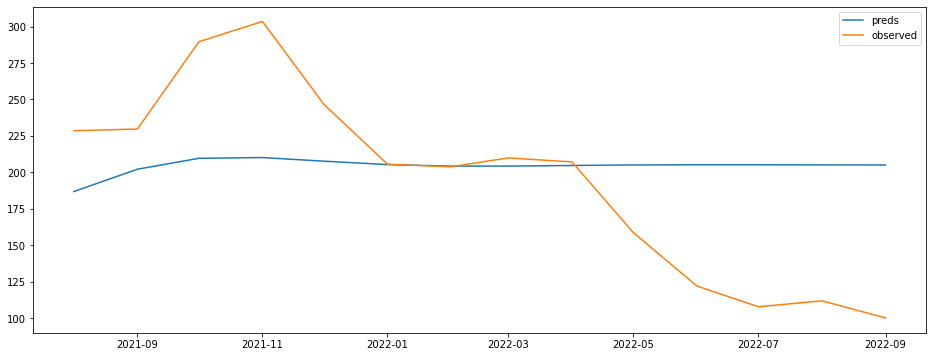

In [77]:
# Plot the observed and predicted value of the test set
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(yhat_test, label='preds')
ax.plot(test_bitcoin, label='observed')
plt.legend();

In [78]:
# Check the RMSE value of the predictions
np.sqrt(mean_squared_error(test_bitcoin, yhat_test))

64.07250543257146

The predictions on the test set certainly left something to be desired. SARIMA (Seasonal Auto Regressive Integrated Moving Average) Model was generated to see if it could perform any better. Firstly, the optimal values that produced the lowest AIC value were found.

In [79]:
# Import the necessary library
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, [1], q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]

In [80]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = SARIMAX(train_bitcoin,
                          order=comb,
                          seasonal_order=combs,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
        except:
            continue
            
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 0, 12)
aic            253.84
Name: 14, dtype: object

The output of the code suggested that ARIMA(1, 1, 1) x (1, 1, 0, 12) yielded the lowest AIC value of 253.84. Those parameters considered to be optimal option out of all the models that were generated.

#### ARIMA(1, 1, 1) x (1, 1, 0, 12) Model

In [107]:
# Generate ARIMA(1, 1, 1) x (1, 1, 0, 12) Model
sari_bitcoin = SARIMAX(train_bitcoin, 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 0, 12), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False).fit()

In [108]:
# Check for AIC
sari_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       Price Bitcoin   No. Observations:                   55
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -122.920
Date:                             Mon, 05 Sep 2022   AIC                            253.840
Time:                                     10:49:06   BIC                            259.309
Sample:                                 01-01-2017   HQIC                           255.552
                                      - 07-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3337      0.192      1.739      0.082      -0.042       0.710
ma.L1          0.8060      0.126      6.408      0.000       0.559       1.052
ar.S.L12      -0.2288      0.184     -1.241      0.215      -0.590       0.133
sigma2       274.0284     81.397      3.367      0.001     114.493     433.564
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.90   Prob(JB):                         0.65
Heteroskedasticity (H):               7.09   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model returned a lot of information, but the focus was on the table of coefficients. The coefficient column showed the importance of each feature and how each one impacted the time series patterns. The P>|z| provided the significance of each feature weight.

For the analyzed time series, weight of ar.S.L12 had a p-value much bigger than 0.05, so it was not reasonable to retain it in the model. The weight was removed and the model without the mentioned weight was generated.

#### ARIMA(1, 1, 1) x (0, 1, 0, 12) Model

In [116]:
# Generate ARIMA(1, 1, 1) x (0, 1, 0, 12) Model
sari_1_bitcoin = SARIMAX(train_bitcoin, 
                         order=(1, 1, 1), 
                         seasonal_order=(0, 1, 0, 12), 
                         enforce_stationarity=False, 
                         enforce_invertibility=False).fit()

In [117]:
# Check for AIC
sari_1_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       Price Bitcoin   No. Observations:                   55
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -171.877
Date:                             Mon, 05 Sep 2022   AIC                            349.753
Time:                                     11:13:39   BIC                            354.820
Sample:                                 01-01-2017   HQIC                           351.585
                                      - 07-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3793      0.174      2.186      0.029       0.039       0.719
ma.L1          0.4381      0.174      2.517      0.012       0.097       0.779
sigma2       315.9182     62.426      5.061      0.000     193.566     438.270
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.57
Prob(Q):                              0.89   Prob(JB):                         0.06
Heteroskedasticity (H):               1.93   Skew:                            -0.40
Prob(H) (two-sided):                  0.25   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Although the AIC value became bigger, it remained the lowest one among the other generated models. Also, after removing the weight with high p-value, the other weights demonstrated the p-value lower than 0.05. A possible explanation why adding ar.S.L12 to model resulted in a lower AIC, but higher p value might be that the mentioned weight was somewhat correlated with other variables. 

In [118]:
# Cross validate the model
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    sarimax = SARIMAX(endog = train_bitcoin_with_ind.iloc[train_ind, -1],
                      order=(1,1,1),
                      seasonal_order=(0,1,0,12),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()
    preds = sarimax.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

22.013733982270832
43.16580302157034
26.826277093079046
18.789862720047747
145.45410924617792


It was reasonable to run model diagnostics to ensure that none of the assumptions made by the model have been violated.

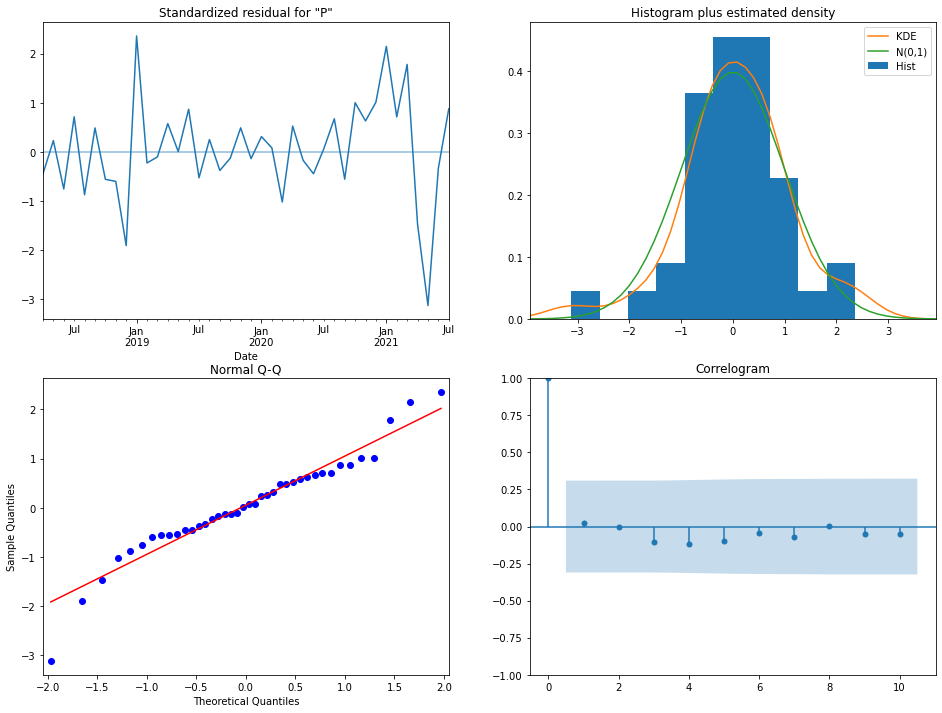

In [119]:
sari_1_bitcoin.plot_diagnostics(figsize=(16, 12))
plt.show()

The purpose here was to ensure that residuals remained uncorrelated, normally distributed having zero mean. In the absence of those assumptions, it was not possible to move forward. 

In the top right plot, the red KDE line followed pretty much close with the N(0,1) line. That was a good indication that the residuals were normally distributed. The qq-plot on the bottom left showed that the ordered distribution of residuals (blue dots) more or less followed the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, that was an indication that the residuals were normally distributed. The residuals over time (top left plot) didn't display any obvious seasonality and appeared to be white noise. That was confirmed by the autocorrelation plot on the bottom right, which showed that the time series residuals had low correlation with lagged versions of itself.

The model was tried on the test set.

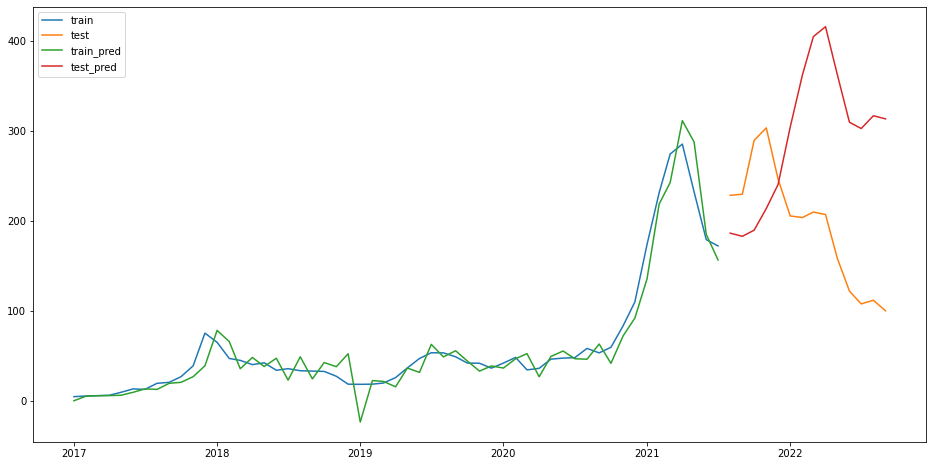

In [120]:
# Evaluate the model's performance and plot the observed and predicted values for train and test sets
y_hat_train = sari_1_bitcoin.predict(typ='levels')
y_hat_test = sari_1_bitcoin.predict(start=test_bitcoin.index[0], end=test_bitcoin.index[-1], typ='levels')
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(train_bitcoin, label='train')
ax.plot(test_bitcoin, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')
plt.legend();

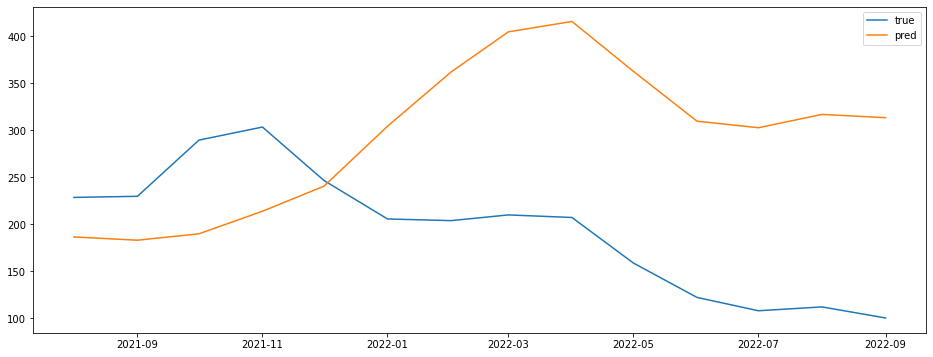

In [121]:
# Plot the predicted and observed values for the test set
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(test_bitcoin, label='true')
ax.plot(y_hat_test, label='pred')
plt.legend();

In [122]:
# Check the RMSE value
np.sqrt(mean_squared_error(test_bitcoin, y_hat_test))

156.1298156257068

Then, the predictions were made into the future.

In [123]:
# Refit the model to the entire set
sari_bitcoin_pred = SARIMAX(bitcoin_normalized, 
                            order=(1, 1, 1), 
                            seasonal_order=(0, 1, 0, 12), 
                            enforce_stationarity=False, 
                            enforce_invertibility=False).fit()

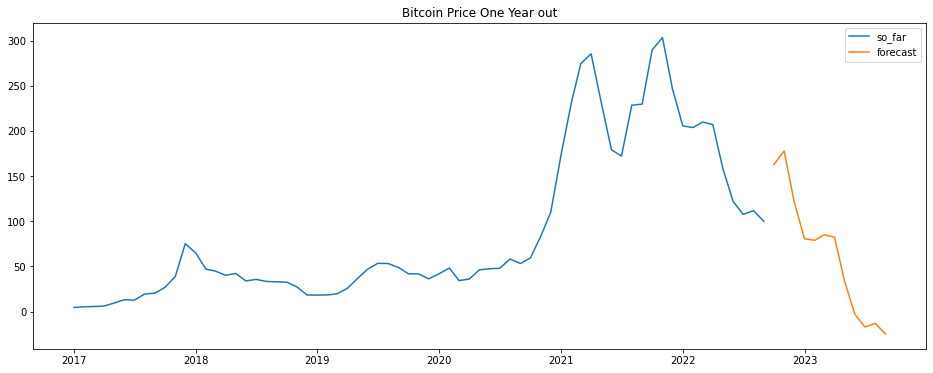

In [128]:
# Get predictions and plot them
forecast_bitcoin = sari_bitcoin_pred.forecast(steps=12)
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(bitcoin_normalized, label='so_far')
ax.plot(forecast_bitcoin, label='forecast')
ax.set_title('Bitcoin Price One Year out')
plt.legend();

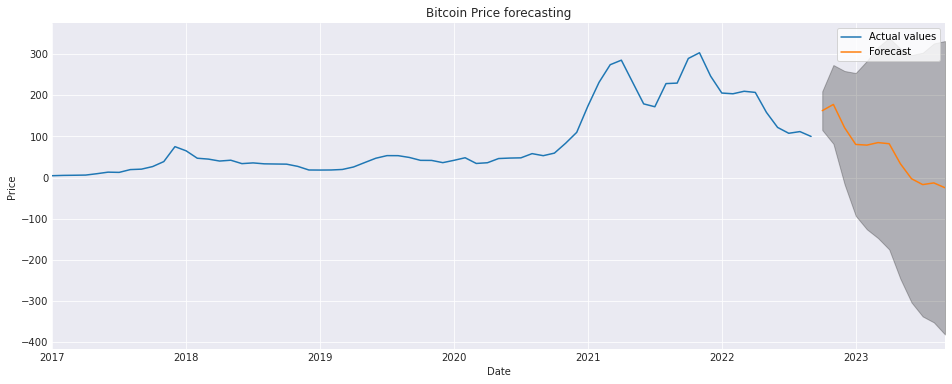

In [129]:
# Get predictions with confidence intervals
forecast_res = sari_bitcoin_pred.get_forecast(steps=12)
forecast_ci = forecast_res.conf_int()
with plt.style.context("seaborn-darkgrid"):

    ax = bitcoin_normalized.plot(label = 'Actual values', figsize = (16, 6))
    
    forecast_res.predicted_mean.plot(ax = ax, label = 'Forecast')

    ax.fill_between(forecast_ci.index,
                    forecast_ci.iloc[:, 0],
                    forecast_ci.iloc[:, 1], color = 'k', alpha = .25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')


plt.title("Bitcoin Price forecasting")
plt.legend()
plt.show()

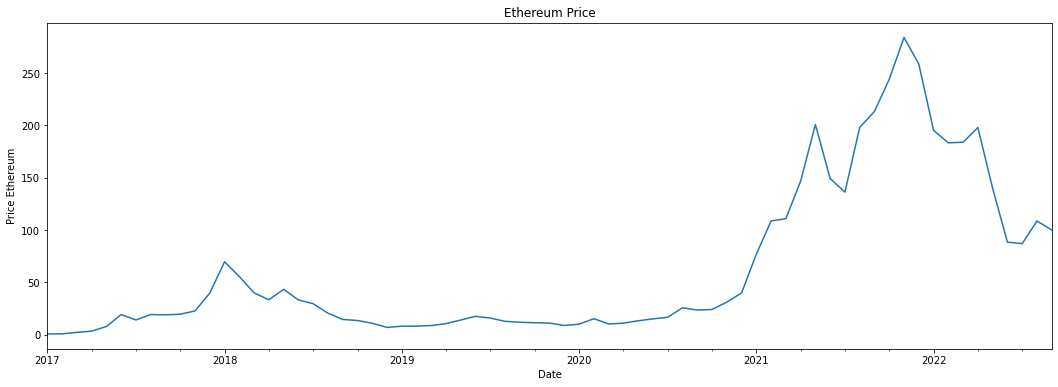

In [88]:
ethereum_normalized.plot(figsize=(18,6))
plt.xlabel('Date')
plt.ylabel('Price Ethereum')
plt.title('Ethereum Price');

In [89]:
ethereum_normalized.describe()

count     69.000000
mean      62.676089
std       74.904023
min        0.649601
25%       11.850819
50%       22.692306
75%      100.000000
max      284.013476
Name: Price Ethereum, dtype: float64

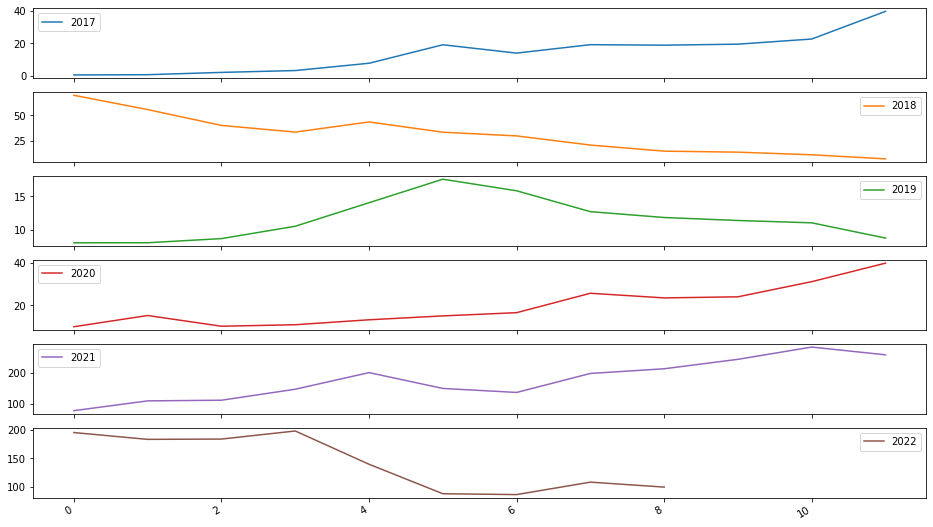

In [90]:
groups_yearly = ethereum_normalized.groupby(pd.Grouper(freq='A'))
year_ethereum = pd.concat([pd.DataFrame(x[1].values) for x in groups_yearly], axis=1)
year_df_ethereum = pd.DataFrame(year_ethereum)
year_df_ethereum.columns = ['2017', '2018', '2019', '2020', '2021', '2022']
year_df_ethereum.plot(figsize=(16,10), subplots=True, legend=True);

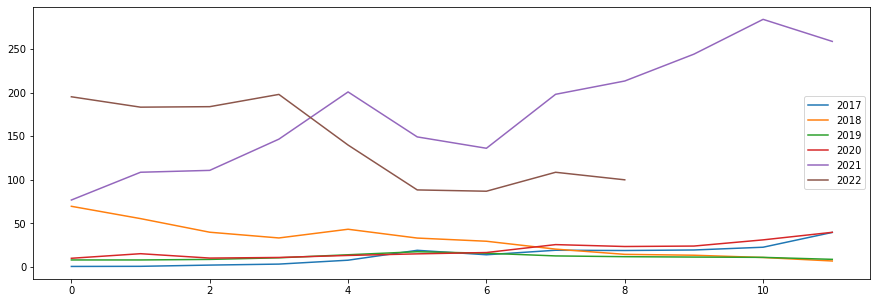

In [91]:
year_df_ethereum.plot(figsize = (15,5), subplots=False, legend=True);

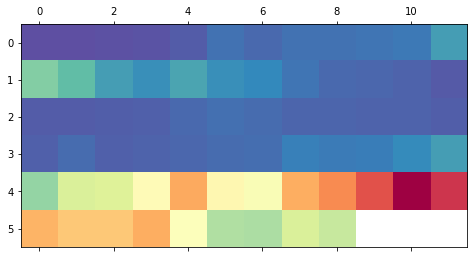

In [92]:
year_matrix = year_df_ethereum.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

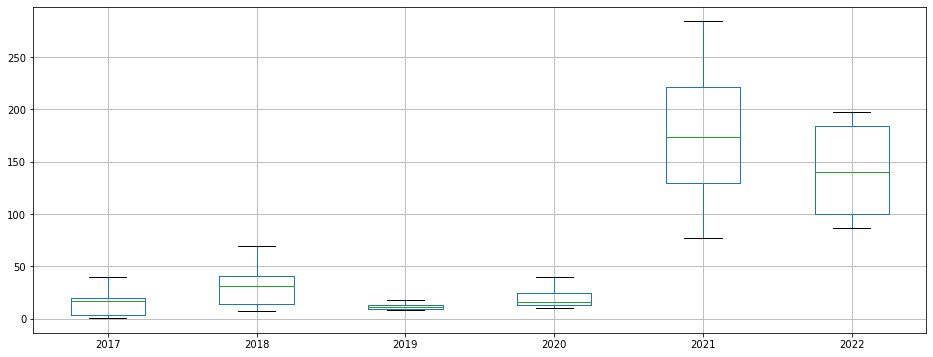

In [93]:
year_df_ethereum.boxplot(figsize=(16,6));

In [94]:
cutoff_ethereum = round(ethereum_normalized.shape[0]*0.8)
cutoff_ethereum

55

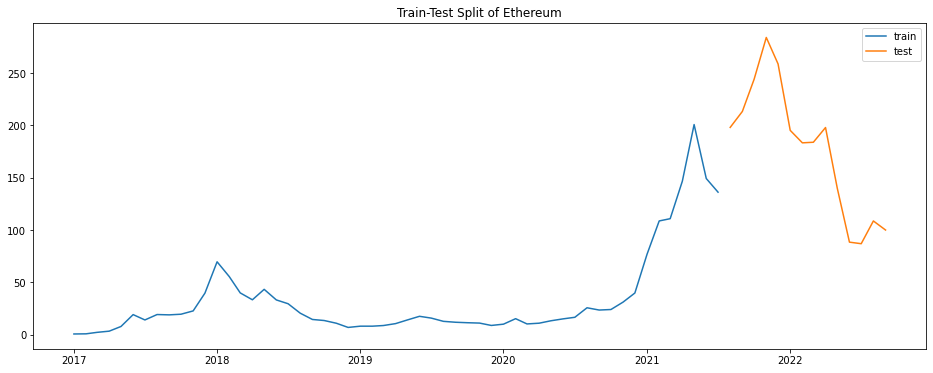

In [95]:
train_ethereum = ethereum_normalized[:cutoff_ethereum]
test_ethereum = ethereum_normalized[cutoff_ethereum:]
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(train_ethereum, label='train')
ax.plot(test_ethereum, label='test')
ax.set_title('Train-Test Split of Ethereum')
plt.legend();

In [96]:
for train_ind, val_ind in split.split(train_ethereum):
    print(train_ind, val_ind)

[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14 15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19 20 21 22 23 24 25 26 27]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27] [28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36] [37 38 39 40 41 42 43 44 45]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] [46 47 48 49 50 51 52 53 54]


In [97]:
train_ethereum

Date
2017-01-01      0.649601
2017-02-01      0.790390
2017-03-01      2.200494
2017-04-01      3.340133
2017-05-01      7.817651
2017-06-01     19.155017
2017-07-01     14.047690
2017-08-01     19.223619
2017-09-01     18.917936
2017-10-01     19.531545
2017-11-01     22.692306
2017-12-01     39.681232
2018-01-01     69.630563
2018-02-01     55.500663
2018-03-01     39.897442
2018-04-01     33.319712
2018-05-01     43.308639
2018-06-01     33.194968
2018-07-01     29.549711
2018-08-01     20.510897
2018-09-01     14.514455
2018-10-01     13.509753
2018-11-01     10.913686
2018-12-01      6.903198
2019-01-01      8.097667
2019-02-01      8.104083
2019-03-01      8.721089
2019-04-01     10.551989
2019-05-01     14.046618
2019-06-01     17.535481
2019-07-01     15.816857
2019-08-01     12.718887
2019-09-01     11.850819
2019-10-01     11.406937
2019-11-01     11.060534
2019-12-01      8.797251
2020-01-01     10.017753
2020-02-01     15.268633
2020-03-01     10.243494
2020-04-01     10.95

In [98]:
train_ethereum.isna().sum()

0

In [99]:
naive_ethereum = train_ethereum.shift(1)
naive_ethereum = naive_ethereum.dropna()
naive_ethereum

Date
2017-02-01      0.649601
2017-03-01      0.790390
2017-04-01      2.200494
2017-05-01      3.340133
2017-06-01      7.817651
2017-07-01     19.155017
2017-08-01     14.047690
2017-09-01     19.223619
2017-10-01     18.917936
2017-11-01     19.531545
2017-12-01     22.692306
2018-01-01     39.681232
2018-02-01     69.630563
2018-03-01     55.500663
2018-04-01     39.897442
2018-05-01     33.319712
2018-06-01     43.308639
2018-07-01     33.194968
2018-08-01     29.549711
2018-09-01     20.510897
2018-10-01     14.514455
2018-11-01     13.509753
2018-12-01     10.913686
2019-01-01      6.903198
2019-02-01      8.097667
2019-03-01      8.104083
2019-04-01      8.721089
2019-05-01     10.551989
2019-06-01     14.046618
2019-07-01     17.535481
2019-08-01     15.816857
2019-09-01     12.718887
2019-10-01     11.850819
2019-11-01     11.406937
2019-12-01     11.060534
2020-01-01      8.797251
2020-02-01     10.017753
2020-03-01     15.268633
2020-04-01     10.243494
2020-05-01     10.95

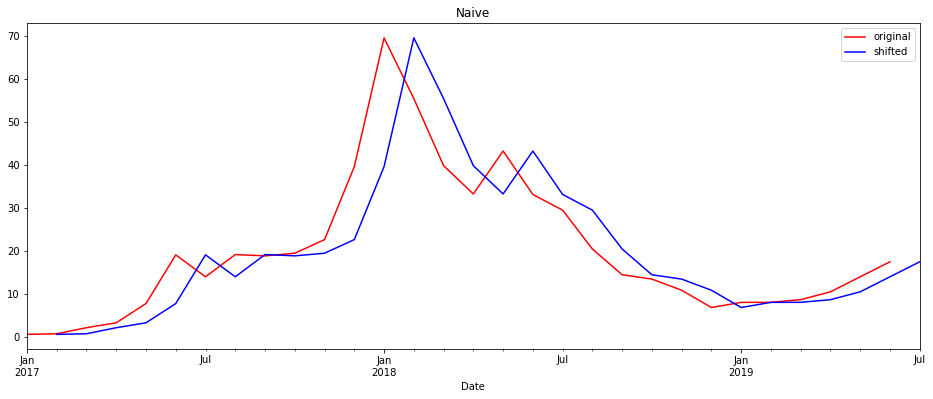

In [100]:
fig, ax = plt.subplots(figsize=(16,6))
train_ethereum[0:30].plot(ax=ax, c='r', label='original')
naive_ethereum[0:30].plot(ax=ax, c='b', label='shifted')
ax.set_title('Naive')
ax.legend();

In [101]:
np.sqrt(mean_squared_error(train_ethereum[1:], naive_ethereum.dropna()))

14.910997884534718

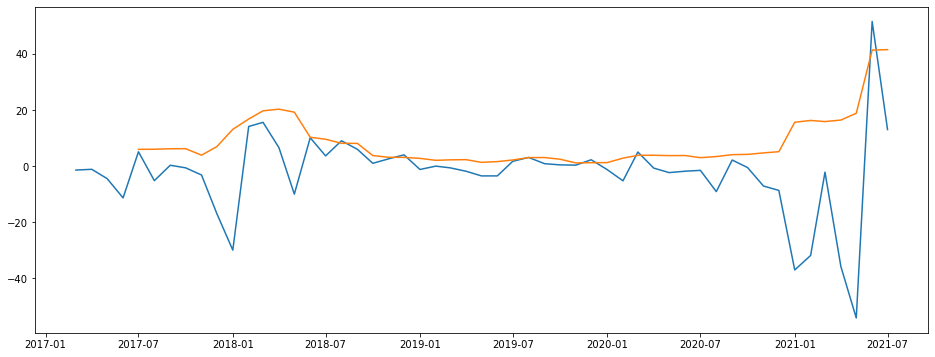

In [102]:
fig, ax = plt.subplots(figsize=(16,6))
residuals_ethereum = naive_ethereum[1:] - train_ethereum[1:]
ax.plot(residuals_ethereum.index, residuals_ethereum)
ax.plot(residuals_ethereum.index, residuals_ethereum.rolling(5).std());

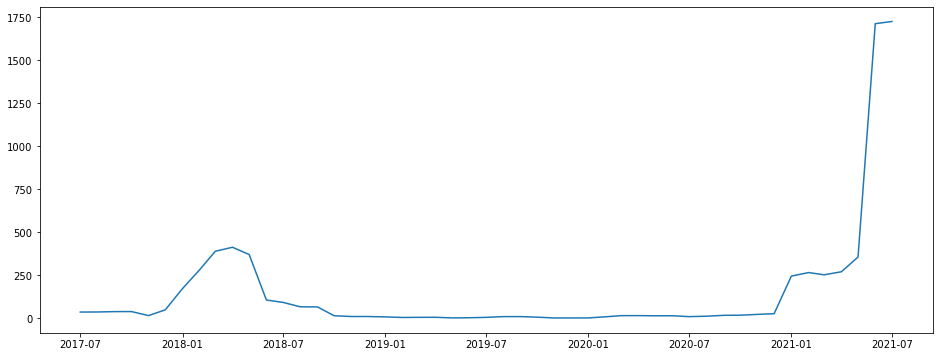

In [103]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(residuals_ethereum.index, residuals_ethereum.rolling(5).var());

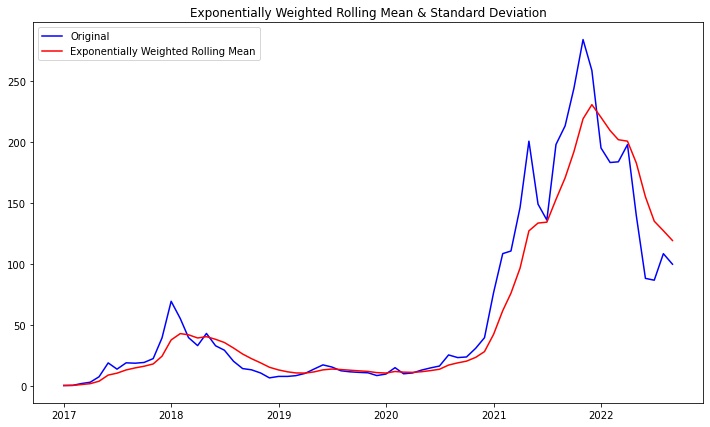

In [104]:
# Use Pandas ewm() to calculate Exponential Weighted Moving Average
exp_roll_mean = ethereum_normalized.ewm(halflife=2).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(ethereum_normalized, color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [105]:
data_minus_exp_roll_mean = ethereum_normalized - exp_roll_mean
data_minus_exp_roll_mean.head(15)

Date
2017-01-01     0.000000
2017-02-01     0.058317
2017-03-01     0.803106
2017-04-01     1.184056
2017-05-01     3.647252
2017-06-01     9.968740
2017-07-01     3.299482
2017-08-01     5.827528
2017-09-01     3.829753
2017-10-01     3.099950
2017-11-01     4.385556
2017-12-01    15.014669
2018-01-01    31.647218
2018-02-01    12.346215
2018-03-01    -2.297752
Freq: MS, Name: Price Ethereum, dtype: float64

In [107]:
cutoff_ethereum = round(data_minus_exp_roll_mean.shape[0]*0.8)
cutoff_ethereum

55

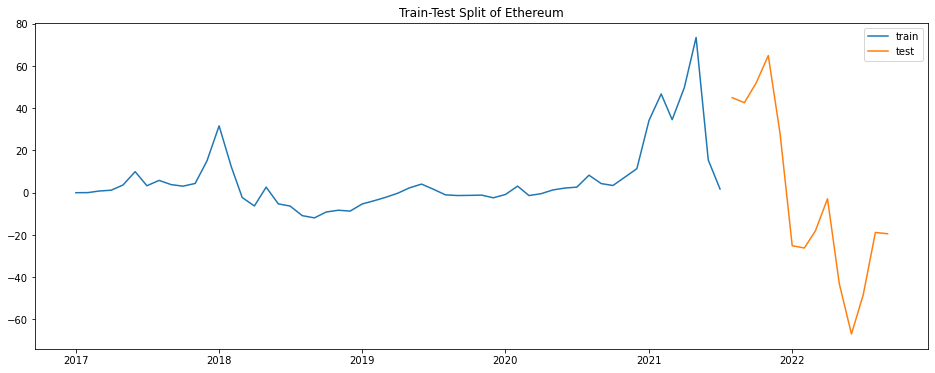

In [108]:
train_ethereum = data_minus_exp_roll_mean[:cutoff_ethereum]
test_ethereum = data_minus_exp_roll_mean[cutoff_ethereum:]
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(train_ethereum, label='train')
ax.plot(test_ethereum, label='test')
ax.set_title('Train-Test Split of Ethereum')
plt.legend();

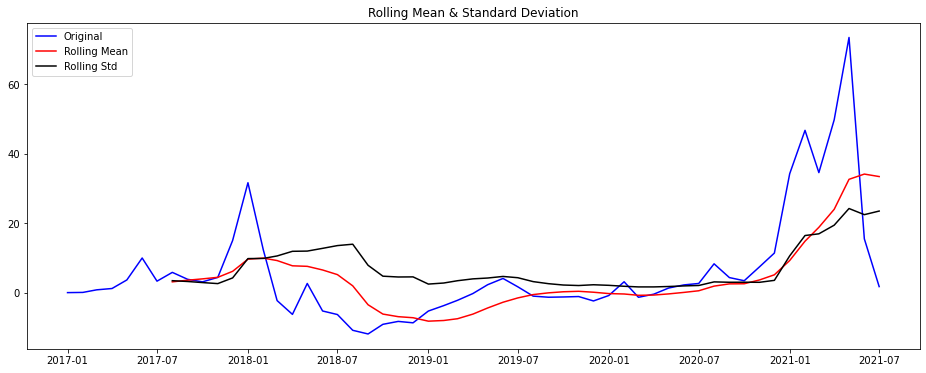

Results of Dickey-Fuller Test: 

Test Statistic                 -2.176165
p-value                         0.215010
#Lags Used                      3.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


In [109]:
stationarity_check(train_ethereum)

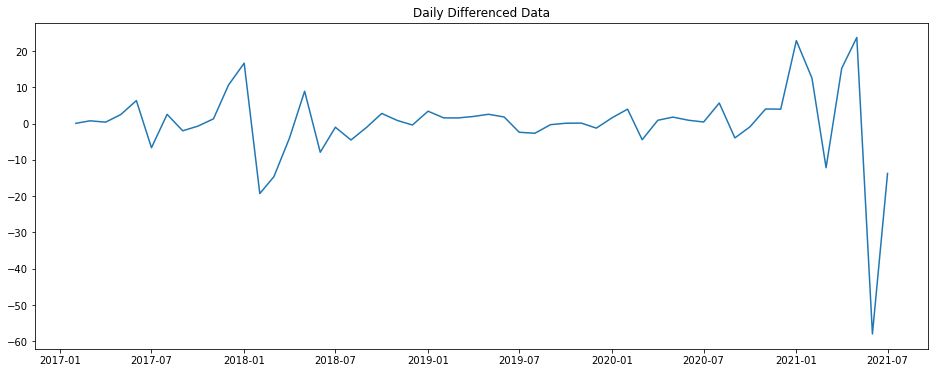

In [110]:
fig, ax = plt.subplots(figsize=(16,6))
train_ethereum_diff = train_ethereum.diff()
ax.plot(train_ethereum_diff)
ax.set_title('Daily Differenced Data');

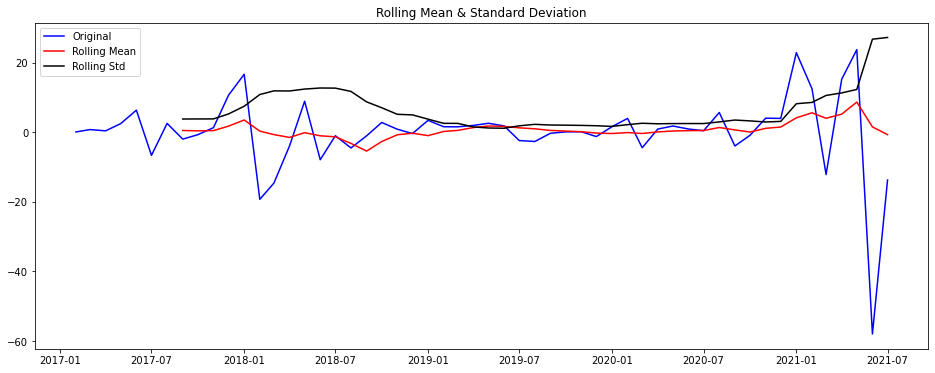

Results of Dickey-Fuller Test: 

Test Statistic                 -3.481772
p-value                         0.008468
#Lags Used                      2.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


In [111]:
stationarity_check(train_ethereum_diff.dropna())

In [112]:
random_walk_ethereum = ARIMA(train_ethereum, order=(0,1,0)).fit()
yhat_rw = random_walk_ethereum.predict(typ='levels')
yhat_rw

Date
2017-01-01     0.000000
2017-02-01     0.000000
2017-03-01     0.058317
2017-04-01     0.803106
2017-05-01     1.184056
2017-06-01     3.647252
2017-07-01     9.968740
2017-08-01     3.299482
2017-09-01     5.827528
2017-10-01     3.829753
2017-11-01     3.099950
2017-12-01     4.385556
2018-01-01    15.014669
2018-02-01    31.647218
2018-03-01    12.346215
2018-04-01    -2.297752
2018-05-01    -6.265719
2018-06-01     2.629685
2018-07-01    -5.287687
2018-08-01    -6.312928
2018-09-01   -10.850925
2018-10-01   -11.909478
2018-11-01    -9.129856
2018-12-01    -8.290294
2019-01-01    -8.697086
2019-02-01    -5.304772
2019-03-01    -3.746314
2019-04-01    -2.212676
2019-05-01    -0.269950
2019-06-01     2.280152
2019-07-01     4.079258
2019-08-01     1.669205
2019-09-01    -1.010283
2019-10-01    -1.328188
2019-11-01    -1.253039
2019-12-01    -1.130974
2020-01-01    -2.400099
2020-02-01    -0.834100
2020-03-01     3.123133
2020-04-01    -1.344921
2020-05-01    -0.448572
2020-06-01 

In [113]:
random_walk_ethereum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Price Ethereum   No. Observations:                   55
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -206.416
Date:                Fri, 02 Sep 2022   AIC                            414.833
Time:                        06:28:13   BIC                            416.822
Sample:                    01-01-2017   HQIC                           415.600
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       122.3857      8.827     13.864      0.000     105.085     139.687
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               389.28
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.27   Skew:                            -2.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
np.sqrt(mean_squared_error(train_ethereum, yhat_rw))

10.961754641975718

In [122]:
train_ethereum_with_ind = train_ethereum.reset_index()
for train_ind, val_ind in split.split(train_ethereum_with_ind):
    ar = ARIMA(endog = train_ethereum_with_ind.iloc[train_ind, -1], order=(0,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_ethereum_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

25.115235963230003
18.678732216146848
3.32393534573668
9.020592074187926
101.27088051795674


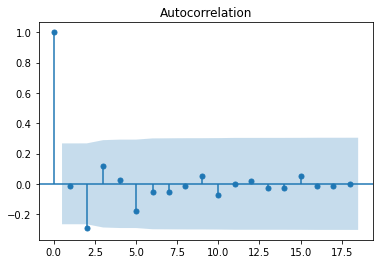

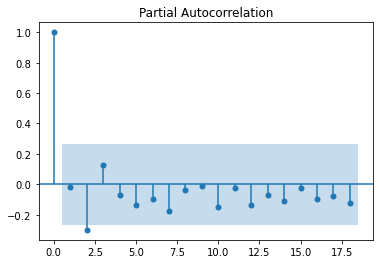

In [115]:
plot_acf(train_ethereum_diff.dropna())
plot_pacf(train_ethereum_diff.dropna());

In [116]:
ar_1_ethereum = ARIMA(train_ethereum, order=(2,1,0)).fit()
yhat_ar1 = ar_1_ethereum.predict(typ='levels')
yhat_ar1

Date
2017-01-01     0.000000
2017-02-01     0.000000
2017-03-01     0.054729
2017-04-01     0.695613
2017-05-01     0.705601
2017-06-01     3.180345
2017-07-01     7.890592
2017-08-01     0.208491
2017-09-01     9.530135
2017-10-01     2.528063
2017-11-01     4.354723
2017-12-01     4.691896
2018-01-01    13.212081
2018-02-01    23.722400
2018-03-01     4.385217
2018-04-01    10.568680
2018-05-01     2.796622
2018-06-01     4.108626
2018-07-01    -9.780966
2018-08-01    -1.523015
2018-09-01    -9.799176
2018-10-01    -9.117919
2018-11-01    -8.775134
2018-12-01   -10.018910
2019-01-01    -9.154517
2019-02-01    -5.396104
2019-03-01    -5.908245
2019-04-01    -3.285976
2019-05-01    -1.368619
2019-06-01     0.879686
2019-07-01     2.392601
2019-08-01     0.839651
2019-09-01     0.679656
2019-10-01     0.290022
2019-11-01    -1.072103
2019-12-01    -1.187441
2020-01-01    -2.348088
2020-02-01    -0.235781
2020-03-01     1.807976
2020-04-01    -3.251161
2020-05-01     2.110077
2020-06-01 

In [117]:
ar_1_ethereum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Price Ethereum   No. Observations:                   55
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -201.216
Date:                Fri, 02 Sep 2022   AIC                            408.432
Time:                        06:28:36   BIC                            414.399
Sample:                    01-01-2017   HQIC                           410.733
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0979      0.109     -0.902      0.367      -0.311       0.115
ar.L2         -0.5923      0.149     -3.968      0.000      -0.885      -0.300
sigma2        99.3347     12.817      7.750      0.000      74.214     124.456
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):               184.59
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               3.53   Skew:                            -1.48
Prob(H) (two-sided):                  0.01   Kurtosis:                        11.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [118]:
np.sqrt(mean_squared_error(train_ethereum, yhat_ar1))

9.875850966153816

In [117]:
for train_ind, val_ind in split.split(train_ethereum_with_ind):
    ar = ARIMA(endog = train_ethereum_with_ind.iloc[train_ind, -1], order=(2,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_ethereum_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

25.108976830881414
21.585375403016965
3.3676517417584564
8.6079834956091
100.89205567030425


In [119]:
ma_1_ethereum = ARIMA(train_ethereum, order=(0,1,2)).fit()
yhat_ma1 = ma_1_ethereum.predict(typ='levels')
yhat_ma1

Date
2017-01-01     0.000000
2017-02-01     0.000000
2017-03-01     0.058014
2017-04-01     0.773649
2017-05-01     0.873463
2017-06-01     3.413068
2017-07-01     8.514458
2017-08-01    -0.020692
2017-09-01     8.444246
2017-10-01     0.836533
2017-11-01     5.480090
2017-12-01     3.214368
2018-01-01    15.424589
2018-02-01    25.231526
2018-03-01     4.015733
2018-04-01     4.551065
2018-05-01    -2.802261
2018-06-01     8.229793
2018-07-01    -7.949441
2018-08-01     0.757363
2018-09-01   -11.547737
2018-10-01    -5.813106
2018-11-01    -8.893768
2018-12-01    -6.558280
2019-01-01    -8.983917
2019-02-01    -4.233778
2019-03-01    -5.683710
2019-04-01    -2.516889
2019-05-01    -2.122687
2019-06-01     1.039673
2019-07-01     1.726509
2019-08-01     0.075011
2019-09-01    -0.965073
2019-10-01    -0.753625
2019-11-01    -1.055531
2019-12-01    -0.867859
2020-01-01    -2.339136
2020-02-01    -0.051067
2020-03-01     2.289099
2020-04-01    -2.959857
2020-05-01     1.423313
2020-06-01 

In [120]:
ma_1_ethereum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Price Ethereum   No. Observations:                   55
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -201.565
Date:                Fri, 02 Sep 2022   AIC                            409.129
Time:                        06:28:52   BIC                            415.096
Sample:                    01-01-2017   HQIC                           411.431
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0139      0.125     -0.112      0.911      -0.259       0.231
ma.L2         -0.5247      0.155     -3.389      0.001      -0.828      -0.221
sigma2       101.0429     13.412      7.534      0.000      74.755     127.331
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               143.30
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.86   Skew:                            -1.22
Prob(H) (two-sided):                  0.01   Kurtosis:                        10.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [121]:
np.sqrt(mean_squared_error(train_ethereum, yhat_ma1))

9.962036146687069

In [126]:
for train_ind, val_ind in split.split(train_ethereum_with_ind):
    ar = ARIMA(endog = train_ethereum_with_ind.iloc[train_ind, -1], order=(0,3,1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_ethereum_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

22.23446201560248
10.868521011728586
11.571508634314897
3.101304568488284
98.3078569392084


In [122]:
arma_model_ethereum = ARIMA(train_ethereum, order=(2,1,2)).fit()
yhat_train = arma_model_ethereum.predict(typ='levels')
yhat_train

Date
2017-01-01     0.000000
2017-02-01     0.000000
2017-03-01     0.046886
2017-04-01     0.524006
2017-05-01     0.849374
2017-06-01     4.037891
2017-07-01     9.199709
2017-08-01     0.165678
2017-09-01    12.092710
2017-10-01    -1.277431
2017-11-01     5.278660
2017-12-01     5.377420
2018-01-01    13.821681
2018-02-01    29.256104
2018-03-01     5.216895
2018-04-01    11.690567
2018-05-01    -8.395285
2018-06-01     0.818634
2018-07-01    -7.717932
2018-08-01    -0.048387
2018-09-01   -14.946768
2018-10-01    -9.459068
2018-11-01    -8.501527
2018-12-01   -11.073628
2019-01-01    -7.116208
2019-02-01    -4.780951
2019-03-01    -6.244702
2019-04-01    -0.925065
2019-05-01    -0.668660
2019-06-01     1.435895
2019-07-01     4.008692
2019-08-01     1.031580
2019-09-01     0.330125
2019-10-01    -0.972095
2019-11-01    -2.002081
2019-12-01    -0.696613
2020-01-01    -2.614484
2020-02-01    -0.109015
2020-03-01     2.362315
2020-04-01    -3.326731
2020-05-01     3.635048
2020-06-01 

In [123]:
arma_model_ethereum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Price Ethereum   No. Observations:                   55
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -198.796
Date:                Fri, 02 Sep 2022   AIC                            407.591
Time:                        06:29:05   BIC                            417.536
Sample:                    01-01-2017   HQIC                           411.427
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7105      0.280     -2.538      0.011      -1.259      -0.162
ar.L2         -0.9029      0.175     -5.148      0.000      -1.247      -0.559
ma.L1          0.8223      0.317      2.593      0.010       0.201       1.444
ma.L2          0.4533      0.273      1.663      0.096      -0.081       0.988
sigma2        88.3471     13.748      6.426      0.000      61.402     115.292
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               176.70
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               2.20   Skew:                            -1.67
Prob(H) (two-sided):                  0.10   Kurtosis:                        11.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
np.sqrt(mean_squared_error(train_ethereum, yhat_train))

9.316834557053456

In [130]:
for train_ind, val_ind in split.split(train_ethereum_with_ind):
    ar = ARIMA(endog = train_ethereum_with_ind.iloc[train_ind, -1], order=(1,3,1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_ethereum_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

24.800598327286743
18.33675801924427
9.976425999794486
6.188375018700971
101.9286116215419


In [125]:
import itertools
p = range(0, 11)
q = range(0, 11)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, [1], q))
ans = []
for comb in pdq:
    try:
        mod = ARIMA(train_ethereum,
                    order=comb)

        output = mod.fit()
        ans.append([comb, output.aic])
    except:
        continue
            
ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq    (2, 1, 3)
aic      404.699
Name: 25, dtype: object

In [126]:
arma_ethereum = ARIMA(train_ethereum, order=(2,1,3)).fit()
y_hat_train = arma_ethereum.predict(typ='levels')
y_hat_train

Date
2017-01-01     0.000000
2017-02-01     0.000000
2017-03-01     0.044416
2017-04-01     0.455728
2017-05-01     0.734257
2017-06-01     3.520768
2017-07-01     7.848092
2017-08-01     0.147827
2017-09-01    11.383748
2017-10-01    -0.363777
2017-11-01     4.422502
2017-12-01     7.590050
2018-01-01    10.534214
2018-02-01    29.413025
2018-03-01     1.910173
2018-04-01     9.923283
2018-05-01     0.712464
2018-06-01    -2.906785
2018-07-01    -2.445204
2018-08-01    -3.336240
2018-09-01   -13.487990
2018-10-01    -6.652616
2018-11-01    -9.202882
2018-12-01   -12.121036
2019-01-01    -4.729815
2019-02-01    -7.307856
2019-03-01    -6.336072
2019-04-01     0.439812
2019-05-01    -3.767225
2019-06-01     2.189780
2019-07-01     4.573585
2019-08-01    -2.412211
2019-09-01     2.785804
2019-10-01    -0.800739
2019-11-01    -3.528173
2019-12-01     2.400489
2020-01-01    -4.892429
2020-02-01     0.090611
2020-03-01     4.821166
2020-04-01    -7.589678
2020-05-01     6.003706
2020-06-01 

In [127]:
arma_ethereum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Price Ethereum   No. Observations:                   55
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -196.350
Date:                Fri, 02 Sep 2022   AIC                            404.699
Time:                        07:08:42   BIC                            416.633
Sample:                    01-01-2017   HQIC                           409.302
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7972      0.184     -4.329      0.000      -1.158      -0.436
ar.L2         -0.9024      0.130     -6.959      0.000      -1.157      -0.648
ma.L1          0.9671     24.067      0.040      0.968     -46.204      48.138
ma.L2          0.4111     24.388      0.017      0.987     -47.389      48.211
ma.L3         -0.4232     14.812     -0.029      0.977     -29.454      28.607
sigma2        72.4489   2518.670      0.029      0.977   -4864.054    5008.951
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               110.49
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.42   Skew:                            -1.20
Prob(H) (two-sided):                  0.07   Kurtosis:                         9.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
np.sqrt(mean_squared_error(train_ethereum, y_hat_train))

8.756330877643952

In [135]:
for train_ind, val_ind in split.split(train_ethereum_with_ind):
    ar = ARIMA(endog = train_ethereum_with_ind.iloc[train_ind, -1], order=(2,3,1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_ethereum_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

21.548725825915607
8.593322854049589
7.738221312138814
7.996319570254429
91.330760650371


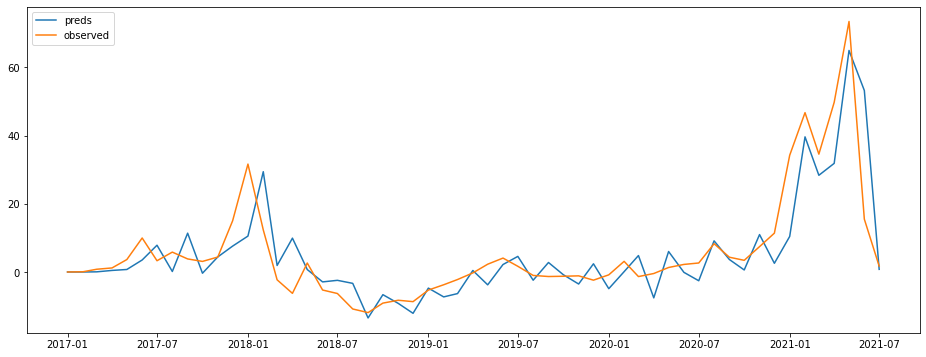

In [129]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(y_hat_train, label='preds')
ax.plot(train_ethereum, label='observed')
plt.legend()
plt.show();

In [130]:
test_ethereum

Date
2021-08-01    44.985526
2021-09-01    42.595169
2021-10-01    51.900538
2021-11-01    64.911152
2021-12-01    28.014639
2022-01-01   -25.089296
2022-02-01   -26.162772
2022-03-01   -18.098762
2022-04-01    -2.860005
2022-05-01   -43.081877
2022-06-01   -66.852166
2022-07-01   -48.325660
2022-08-01   -18.806849
2022-09-01   -19.411702
Freq: MS, Name: Price Ethereum, dtype: float64

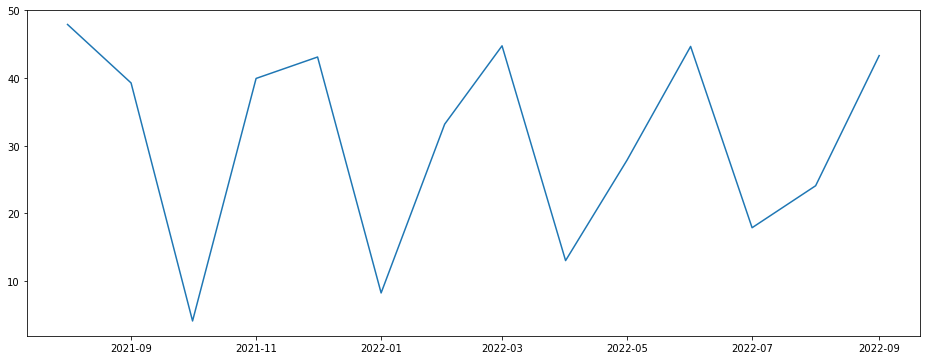

In [131]:
y_hat_test = arma_ethereum.predict(start=test_ethereum.index[0], end=test_ethereum.index[-1], typ='levels')
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(y_hat_test);

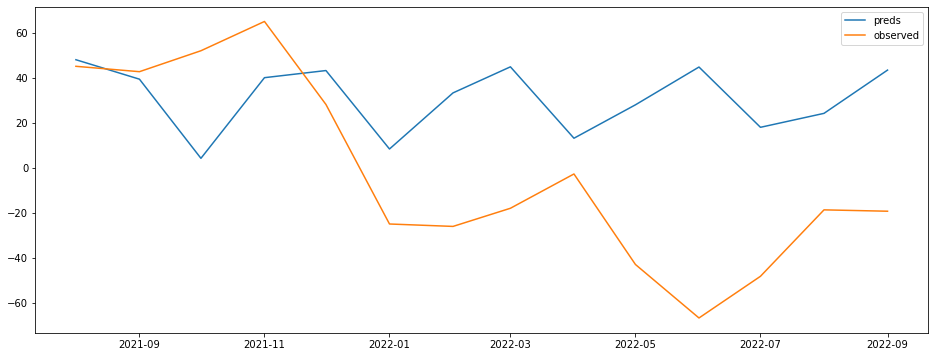

In [132]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(y_hat_test, label='preds')
ax.plot(test_ethereum, label='observed')
plt.legend();

In [133]:
np.sqrt(mean_squared_error(test_ethereum, y_hat_test))

53.19468592915518

In [134]:
p = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, [1], q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]

In [135]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = SARIMAX(train_ethereum,
                          order=comb,
                          seasonal_order=combs,
                          enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
        except:
            continue
            
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 1, 0)
pdqs    (0, 1, 0, 12)
aic           337.653
Name: 0, dtype: object

In [137]:
sari_ethereum = SARIMAX(train_ethereum, 
                        order=(0, 1, 0), 
                        seasonal_order=(0, 1, 0, 12), 
                        enforce_invertibility=False).fit()

In [138]:
sari_ethereum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     Price Ethereum   No. Observations:                   55
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -167.827
Date:                            Fri, 02 Sep 2022   AIC                            337.653
Time:                                    07:11:46   BIC                            339.391
Sample:                                01-01-2017   HQIC                           338.290
                                     - 07-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       173.0798     17.393      9.951      0.000     138.990     207.170
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               109.46
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.58   Skew:                            -1.78
Prob(H) (two-sided):                  0.09   Kurtosis:                        10.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
for train_ind, val_ind in split.split(train_ethereum_with_ind):
    sarimax = SARIMAX(endog = train_ethereum_with_ind.iloc[train_ind, -1],
                      order=(0,3,1),
                      seasonal_order=(1,3,0,12),
                      enforce_invertibility=False).fit()
    preds = sarimax.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_ethereum_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

32.33387340692233
863.6793206598313
481.31389233212946
572.2993380909587
37.92544749362763


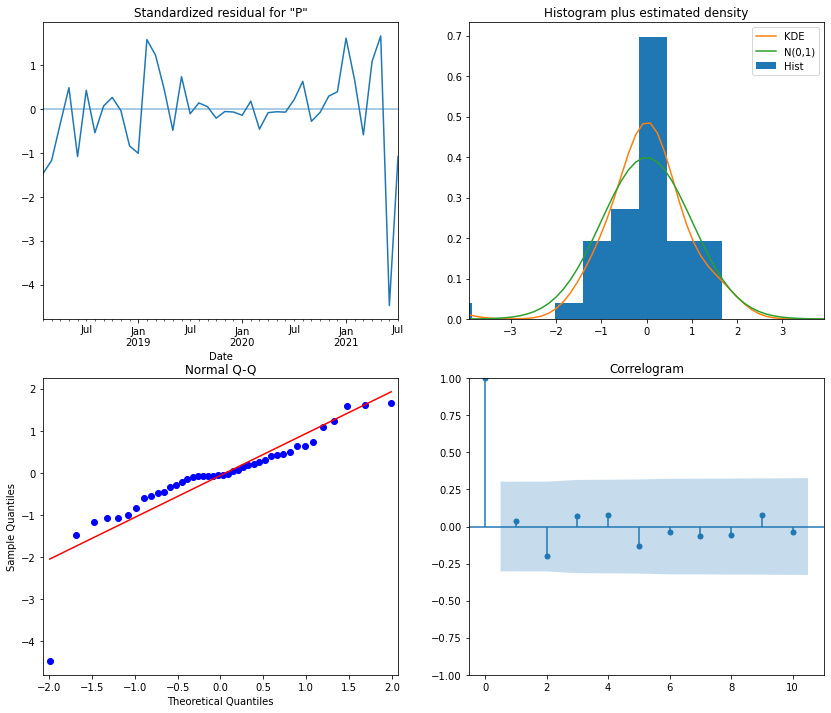

In [141]:
sari_ethereum.plot_diagnostics(figsize=(14, 12))
plt.show()

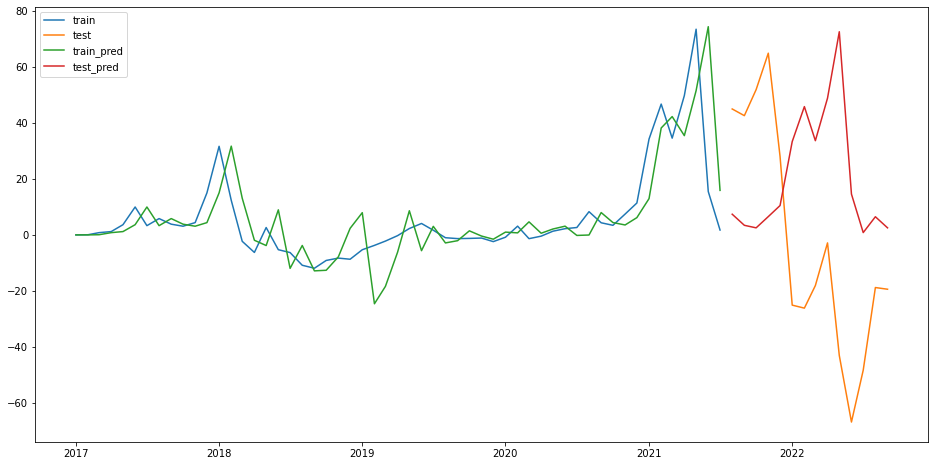

In [142]:
y_hat_train = sari_ethereum.predict(typ='levels')
y_hat_test = sari_ethereum.predict(start=test_ethereum.index[0], end=test_ethereum.index[-1], typ='levels')
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(train_ethereum, label='train')
ax.plot(test_ethereum, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')
plt.legend();

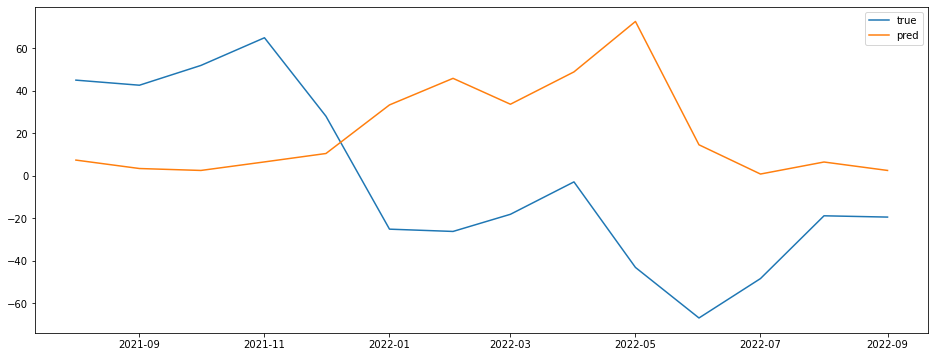

In [143]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(test_ethereum, label='true')
ax.plot(y_hat_test, label='pred')
plt.legend();

In [159]:
np.sqrt(mean_squared_error(test_ethereum, y_hat_test))

170.0059322721219

In [144]:
sari_ethereum_pred = SARIMAX(ethereum_normalized, 
                            order=(0, 1, 0), 
                            seasonal_order=(0, 1, 0, 12), 
                            enforce_stationarity=False, 
                            enforce_invertibility=False).fit()

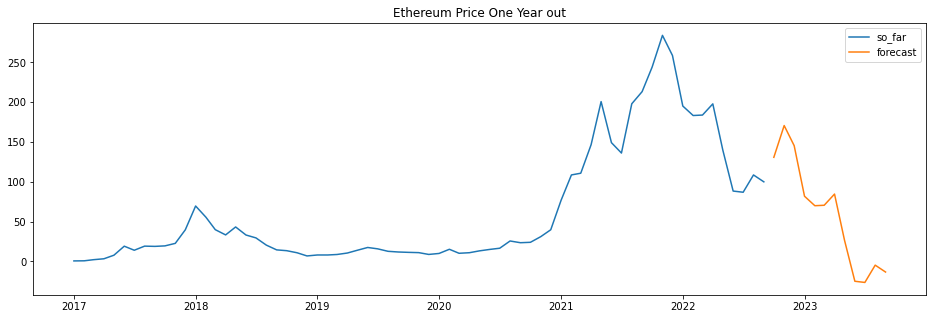

In [145]:
forecast_ethereum = sari_ethereum_pred.forecast(steps=12)
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(ethereum_normalized, label='so_far')
ax.plot(forecast_ethereum, label='forecast')
ax.set_title('Ethereum Price One Year out')
plt.legend();

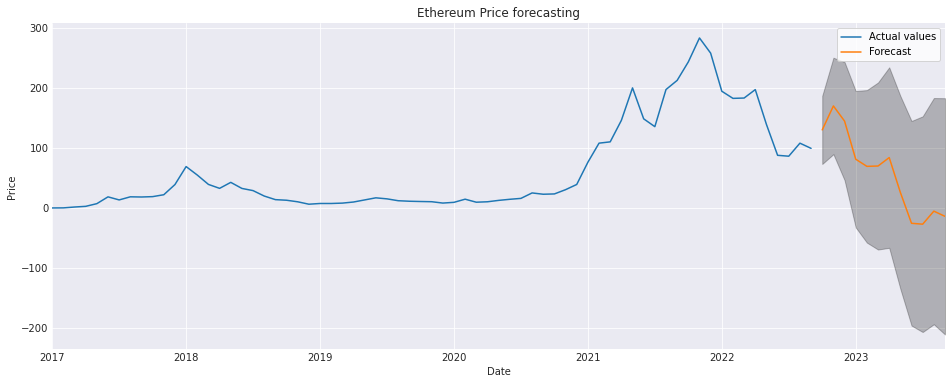

In [146]:
forecast_res = sari_ethereum_pred.get_forecast(steps=12)
forecast_ci = forecast_res.conf_int()
with plt.style.context("seaborn-darkgrid"):

    ax = ethereum_normalized.plot(label = 'Actual values', figsize = (16, 6))
    
    forecast_res.predicted_mean.plot(ax = ax, label = 'Forecast')

    ax.fill_between(forecast_ci.index,
                    forecast_ci.iloc[:, 0],
                    forecast_ci.iloc[:, 1], color = 'k', alpha = .25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')


plt.title("Ethereum Price forecasting")
plt.legend()
plt.show()

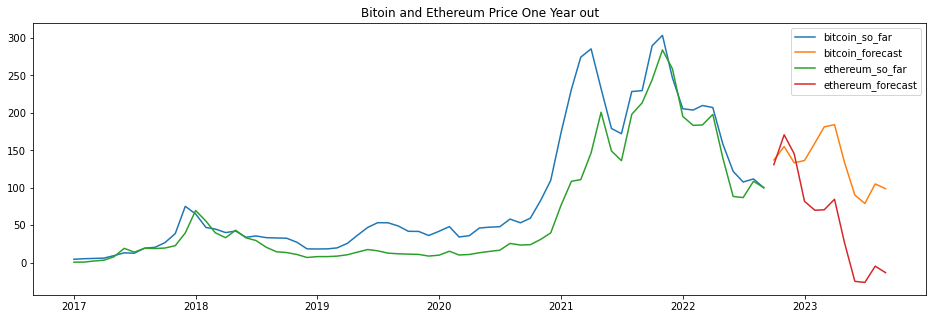

In [168]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(bitcoin_normalized, label='bitcoin_so_far')
ax.plot(forecast_bitcoin, label='bitcoin_forecast')
ax.plot(ethereum_normalized, label='ethereum_so_far')
ax.plot(forecast_ethereum, label='ethereum_forecast')
ax.set_title('Bitoin and Ethereum Price One Year out')
plt.legend();